In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import train
import pickle
from imblearn.under_sampling import RandomUnderSampler


In [2]:
dfList = train.transform("data.json")
#df.shape

In [3]:
df1List = dfList
dfList = df1List
for df in dfList:
    scaler = MinMaxScaler(feature_range=(0,1)).fit(df)
    df = scaler.transform(df)
#print(dfList[12])
#print(dfList[0].head(5))

In [4]:
def eval(accList, precisionList, tprList, farList, frrList, y, y_pred):
    avgaccuracy = 0
    avgPrecision = 0
    avgTpr = 0
    avgFar = 0
    avgFrr = 0
    for i in range(len(accList)):
        avgaccuracy += accList[i]
        avgPrecision += precisionList[i]
        avgTpr += tprList[i]
        avgFar += farList[i]
        avgFrr += frrList[i]
    avgaccuracy = avgaccuracy / len(accList)
    avgPrecision = avgPrecision / len(precisionList)
    avgTpr = avgTpr / len(tprList)
    avgFar = avgFar / len(farList)
    avgFrr = avgFrr / len(frrList)
    
    fprROC, tprROC, threshold = roc_curve(y, y_pred, pos_label=1) #fprROC == avgFar, tprROC == avgTpr
    fnrROC = 1 - tprROC #fnrROC == avgFrr
    EER = fprROC[np.nanargmin(np.absolute((fnrROC - fprROC)))]

    print("average acc = "+str(avgaccuracy))
    print("average precision = "+str(avgPrecision))
    print("average TPR = "+str(avgTpr))
    print("average FAR = "+str(avgFar))
    print("average FRR = "+str(avgFrr))
    print("average EER = "+str(EER))

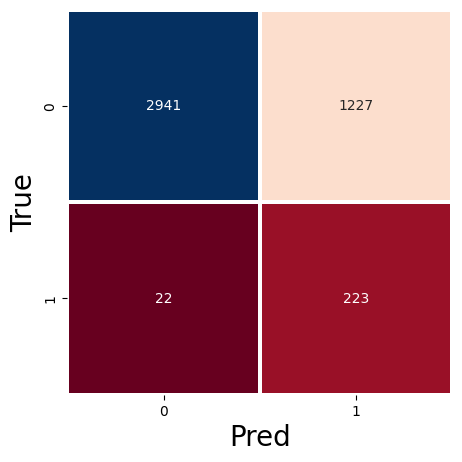

acc = 0.7169725810106503
precision = 0.15379310344827588
TPR = 0.9102040816326531
FAR = 0.29438579654510555
FRR = 0.08979591836734693


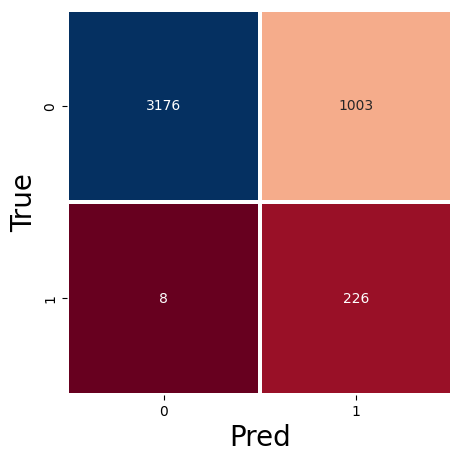

acc = 0.7709041468388851
precision = 0.1838893409275834
TPR = 0.9658119658119658
FAR = 0.24000957166786313
FRR = 0.03418803418803419


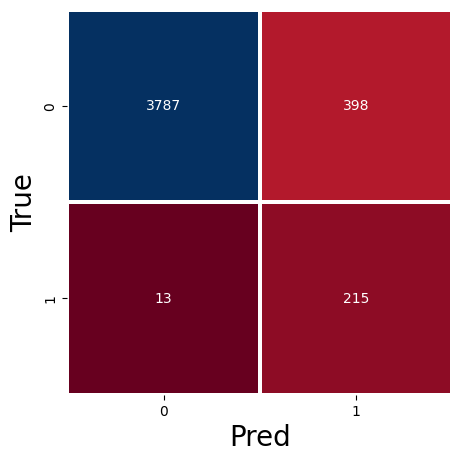

acc = 0.9068660774983005
precision = 0.35073409461663946
TPR = 0.9429824561403509
FAR = 0.09510155316606929
FRR = 0.05701754385964912


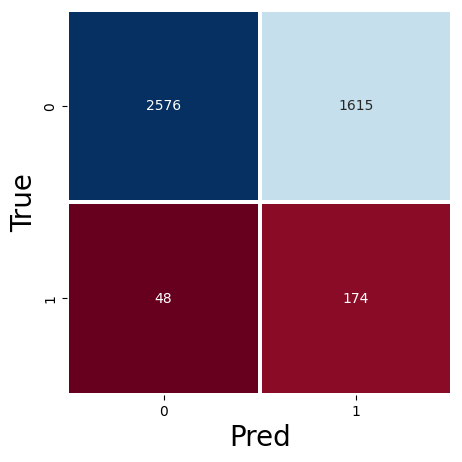

acc = 0.6231588488556538
precision = 0.09726103968697597
TPR = 0.7837837837837838
FAR = 0.38534955857790504
FRR = 0.21621621621621623


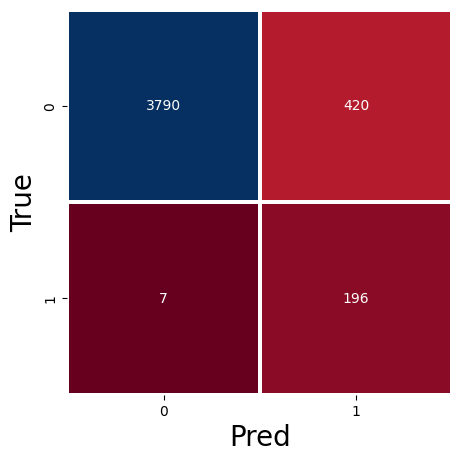

acc = 0.9032404260140494
precision = 0.3181818181818182
TPR = 0.9655172413793104
FAR = 0.0997624703087886
FRR = 0.034482758620689655


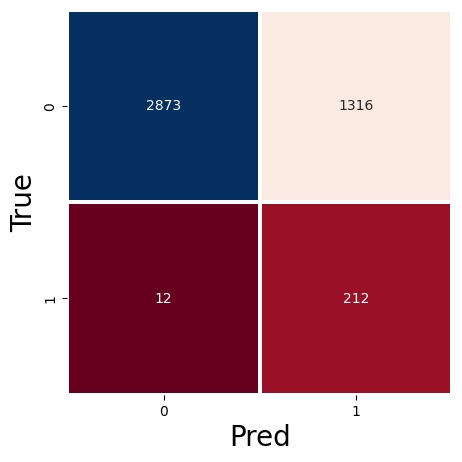

acc = 0.6990709268071607
precision = 0.1387434554973822
TPR = 0.9464285714285714
FAR = 0.3141561231797565
FRR = 0.05357142857142857


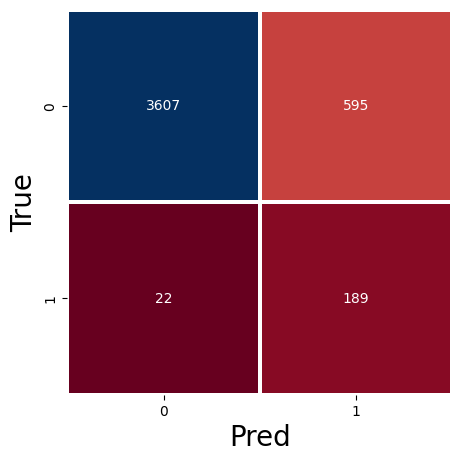

acc = 0.8601858146385679
precision = 0.24107142857142858
TPR = 0.8957345971563981
FAR = 0.1415992384578772
FRR = 0.10426540284360189


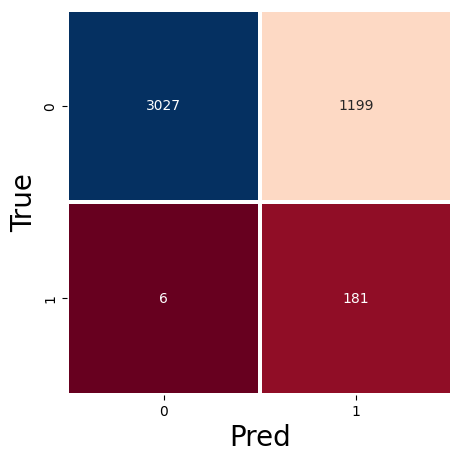

acc = 0.7269431225923408
precision = 0.13115942028985508
TPR = 0.9679144385026738
FAR = 0.283719829626124
FRR = 0.03208556149732621


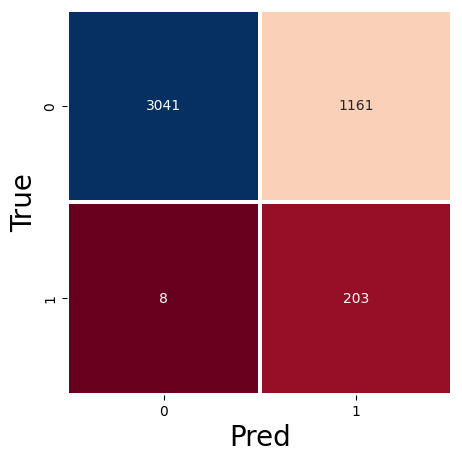

acc = 0.7351008384319058
precision = 0.14882697947214077
TPR = 0.9620853080568721
FAR = 0.2762970014278915
FRR = 0.037914691943127965


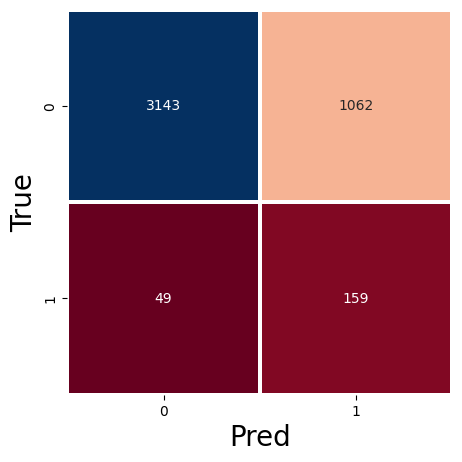

acc = 0.7482438250623159
precision = 0.13022113022113022
TPR = 0.7644230769230769
FAR = 0.2525564803804994
FRR = 0.23557692307692307


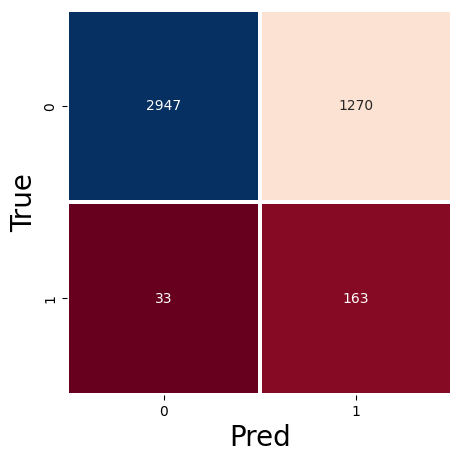

acc = 0.7047360072513029
precision = 0.1137473831123517
TPR = 0.8316326530612245
FAR = 0.3011619634811477
FRR = 0.1683673469387755


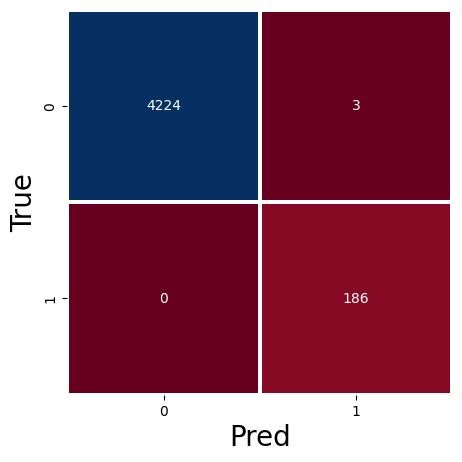

acc = 0.9993201903467029
precision = 0.9841269841269841
TPR = 1.0
FAR = 0.0007097232079489
FRR = 0.0


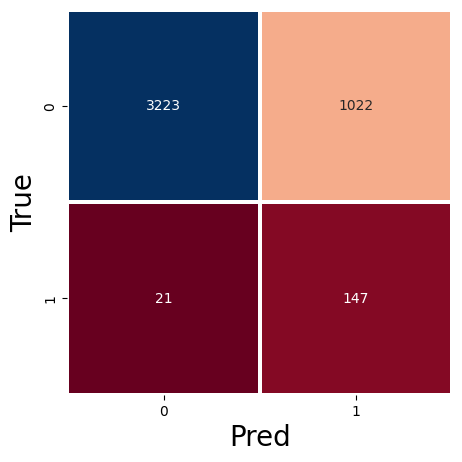

acc = 0.763652843870383
precision = 0.12574850299401197
TPR = 0.875
FAR = 0.24075382803297998
FRR = 0.125


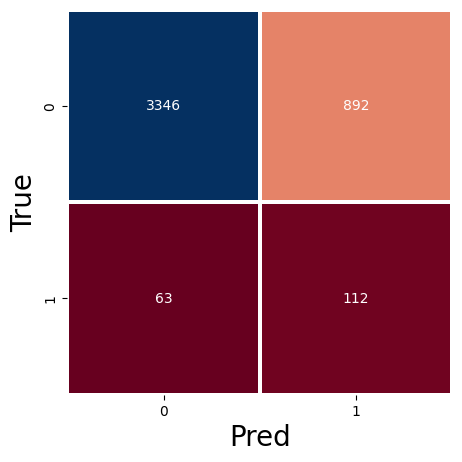

acc = 0.7835939270337638
precision = 0.11155378486055777
TPR = 0.64
FAR = 0.2104766399244927
FRR = 0.36


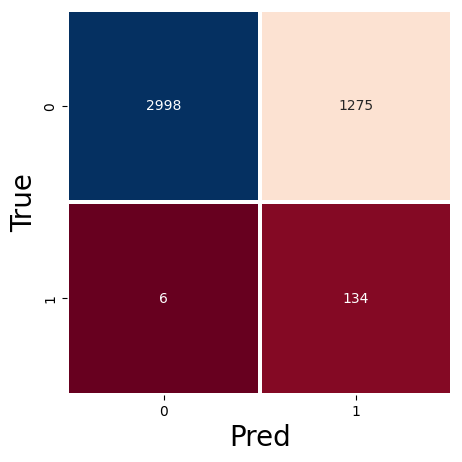

acc = 0.7097212780421482
precision = 0.09510290986515259
TPR = 0.9571428571428572
FAR = 0.29838520945471564
FRR = 0.04285714285714286


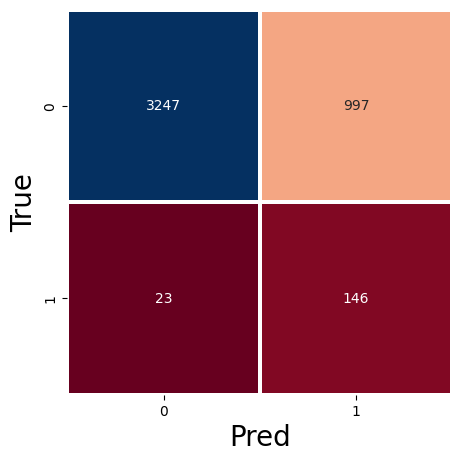

acc = 0.7688647178789939
precision = 0.12773403324584426
TPR = 0.863905325443787
FAR = 0.23491988689915175
FRR = 0.13609467455621302


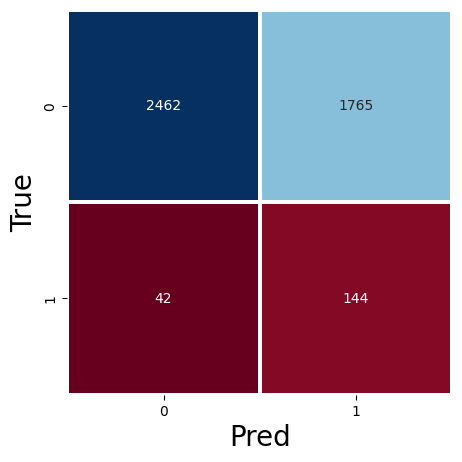

acc = 0.590527985497394
precision = 0.07543216343635412
TPR = 0.7741935483870968
FAR = 0.4175538206766028
FRR = 0.22580645161290322


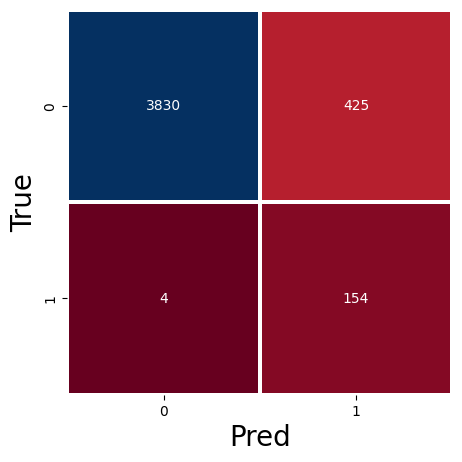

acc = 0.902787219578518
precision = 0.2659758203799655
TPR = 0.9746835443037974
FAR = 0.099882491186839
FRR = 0.02531645569620253


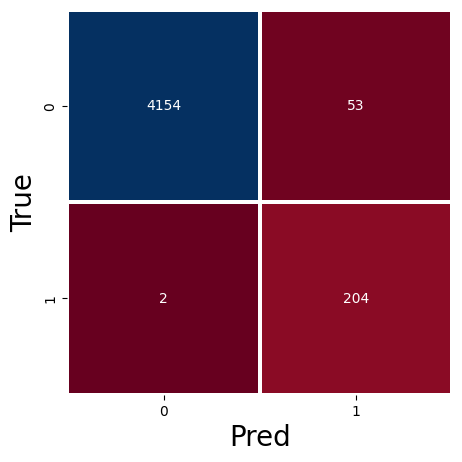

acc = 0.9875368230228869
precision = 0.7937743190661478
TPR = 0.9902912621359223
FAR = 0.012598050867601617
FRR = 0.009708737864077669


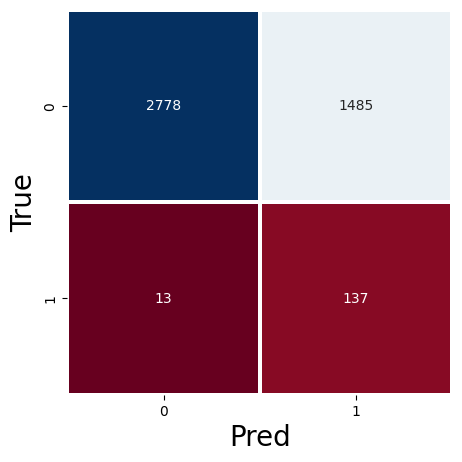

acc = 0.660548379786993
precision = 0.08446362515413071
TPR = 0.9133333333333333
FAR = 0.3483462350457424
FRR = 0.08666666666666667


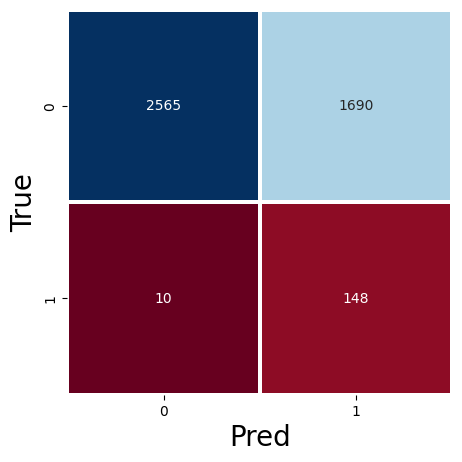

acc = 0.6147745297983231
precision = 0.08052230685527748
TPR = 0.9367088607594937
FAR = 0.3971797884841363
FRR = 0.06329113924050633


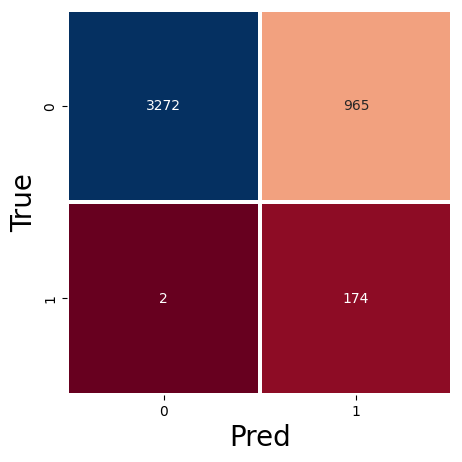

acc = 0.7808746884205756
precision = 0.1527655838454785
TPR = 0.9886363636363636
FAR = 0.22775548737314139
FRR = 0.011363636363636364


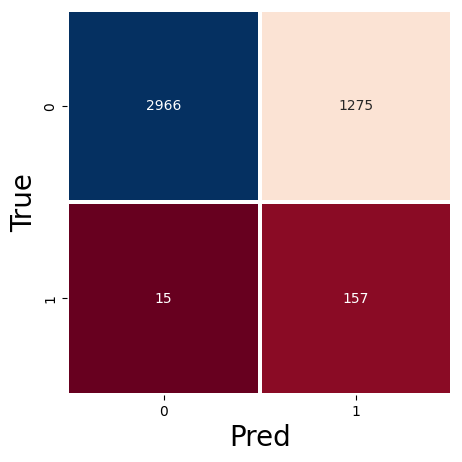

acc = 0.707681849082257
precision = 0.10963687150837989
TPR = 0.9127906976744186
FAR = 0.300636642301344
FRR = 0.0872093023255814
average acc = 0.7680568281460901
average precision = 0.2180202651897333
average TPR = 0.9027479985519109
average FAR = 0.23796945175103143
average FRR = 0.09725200144808911
average EER = 0.300636642301344


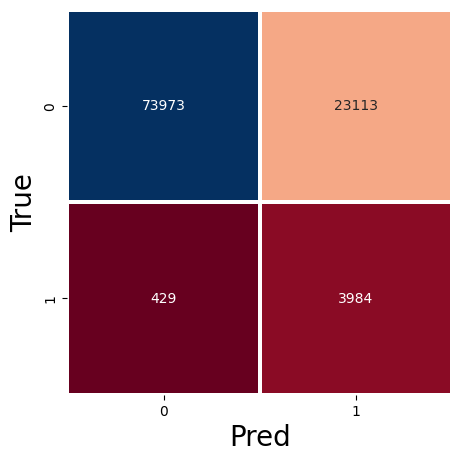

In [5]:
import pickle
#i=0
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set]
    k_fold = KFold(5, shuffle=True, random_state=42)
    
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        #X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
        X_re, y_re = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train.astype('int'))
        model = svm.SVC(kernel='rbf', C=10).fit(X_re, y_re)

        model.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = model.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set]
    
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


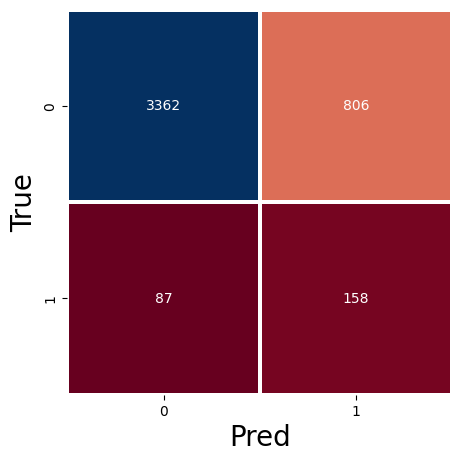

acc = 0.7976433265352368
precision = 0.16390041493775934
TPR = 0.6448979591836734
FAR = 0.1933781190019194
FRR = 0.3551020408163265


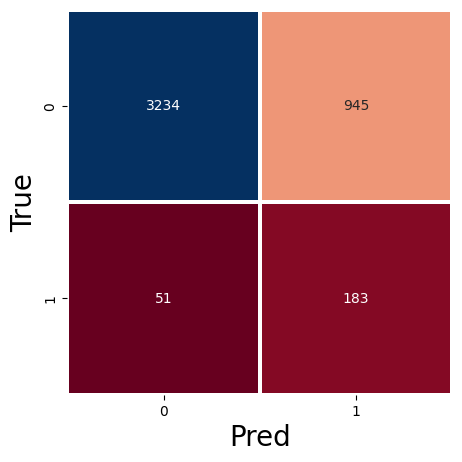

acc = 0.7743031951053705
precision = 0.1622340425531915
TPR = 0.782051282051282
FAR = 0.22613065326633167
FRR = 0.21794871794871795


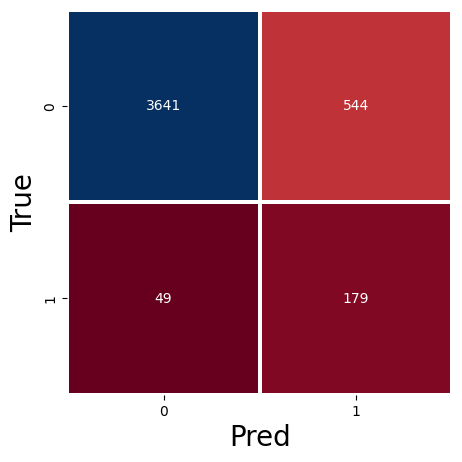

acc = 0.8656242918649445
precision = 0.2475795297372061
TPR = 0.7850877192982456
FAR = 0.12998805256869772
FRR = 0.2149122807017544


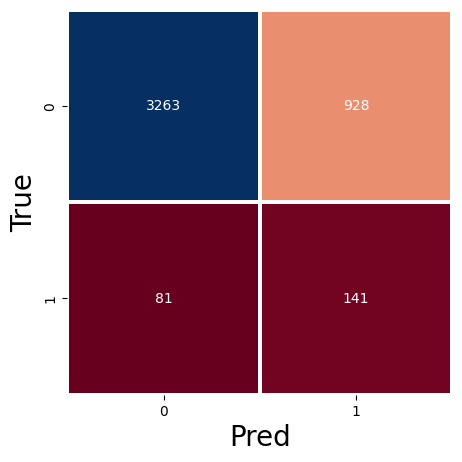

acc = 0.7713573532744165
precision = 0.13189897100093545
TPR = 0.6351351351351351
FAR = 0.22142686709615844
FRR = 0.36486486486486486


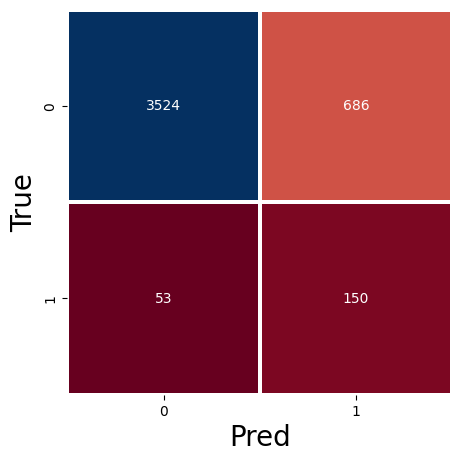

acc = 0.8325402220711534
precision = 0.17942583732057416
TPR = 0.7389162561576355
FAR = 0.16294536817102137
FRR = 0.26108374384236455


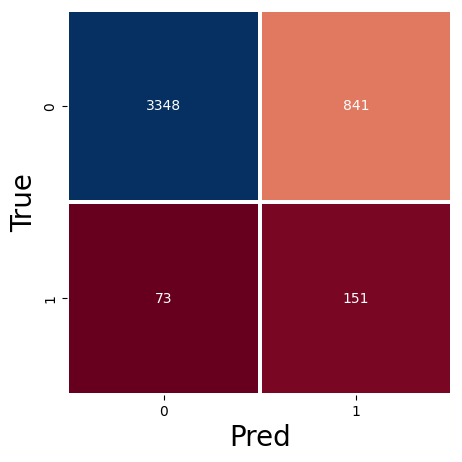

acc = 0.7928846589621572
precision = 0.15221774193548387
TPR = 0.6741071428571429
FAR = 0.2007639054666985
FRR = 0.32589285714285715


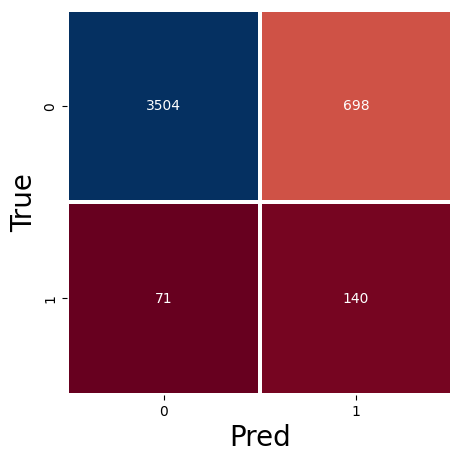

acc = 0.8257421255381826
precision = 0.16706443914081145
TPR = 0.6635071090047393
FAR = 0.1661113755354593
FRR = 0.33649289099526064


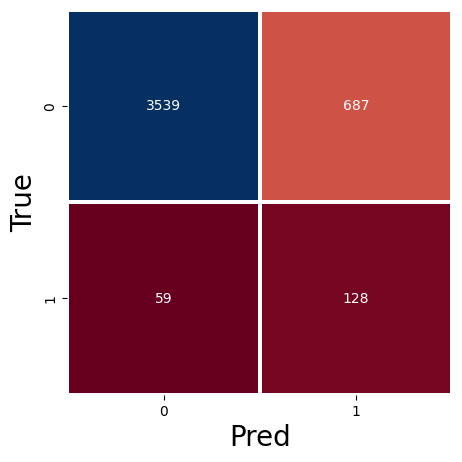

acc = 0.8309539995467936
precision = 0.1570552147239264
TPR = 0.6844919786096256
FAR = 0.16256507335541884
FRR = 0.3155080213903743


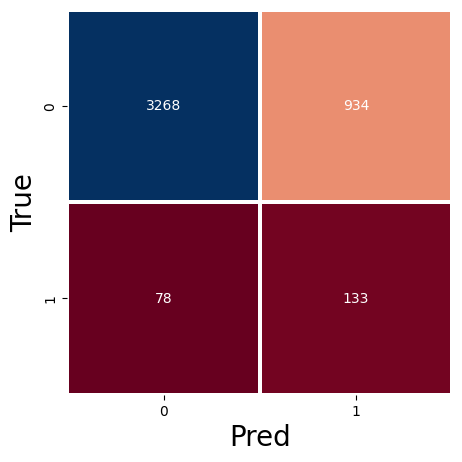

acc = 0.7706775436211194
precision = 0.1246485473289597
TPR = 0.6303317535545023
FAR = 0.22227510709186102
FRR = 0.3696682464454976


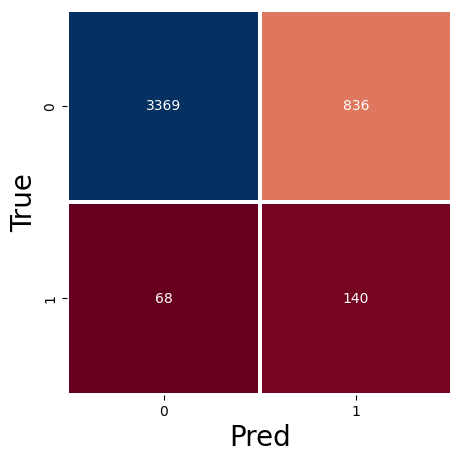

acc = 0.7951506911398142
precision = 0.14344262295081966
TPR = 0.6730769230769231
FAR = 0.19881093935790725
FRR = 0.3269230769230769


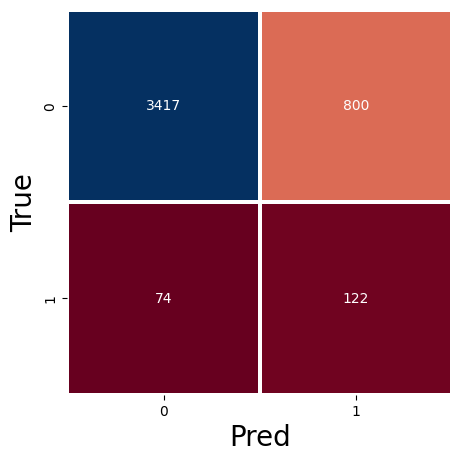

acc = 0.801948787672785
precision = 0.13232104121475055
TPR = 0.6224489795918368
FAR = 0.18970832345269148
FRR = 0.37755102040816324


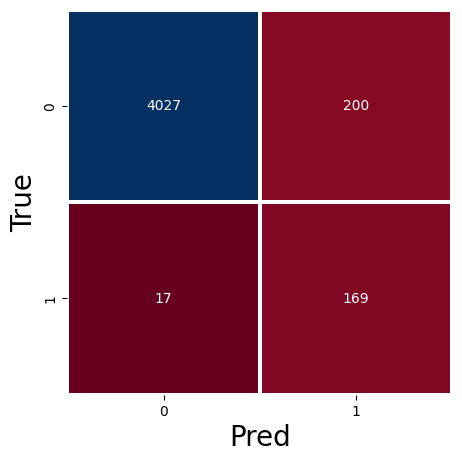

acc = 0.9508271017448447
precision = 0.45799457994579945
TPR = 0.9086021505376344
FAR = 0.04731488052992666
FRR = 0.0913978494623656


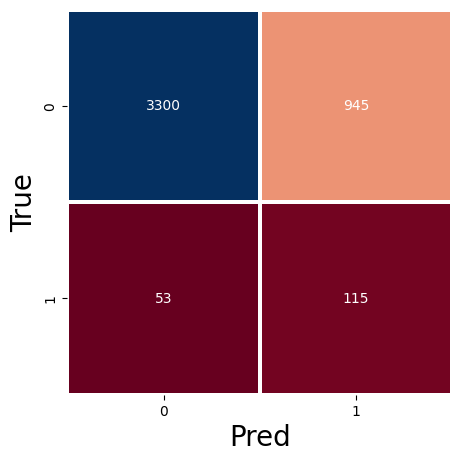

acc = 0.7738499886698391
precision = 0.10849056603773585
TPR = 0.6845238095238095
FAR = 0.2226148409893993
FRR = 0.31547619047619047


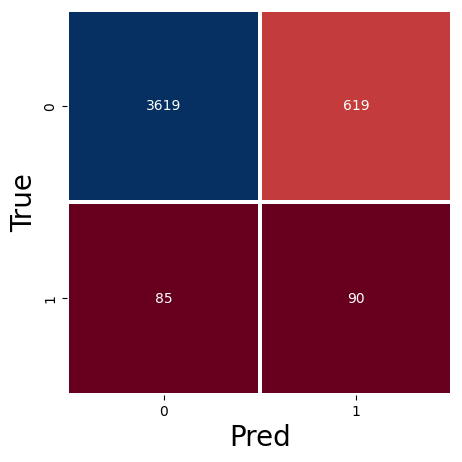

acc = 0.8404713346929527
precision = 0.12693935119887165
TPR = 0.5142857142857142
FAR = 0.14605946201038225
FRR = 0.4857142857142857


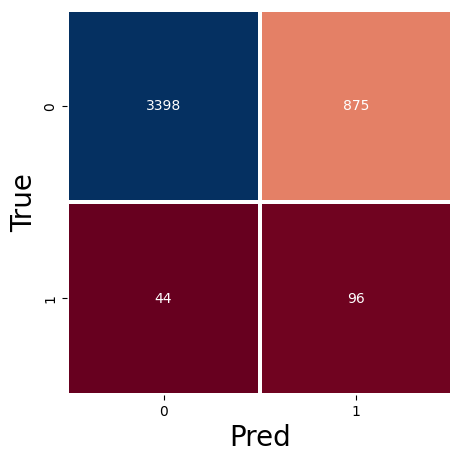

acc = 0.7917516428733288
precision = 0.09886714727085479
TPR = 0.6857142857142857
FAR = 0.20477416335127546
FRR = 0.3142857142857143


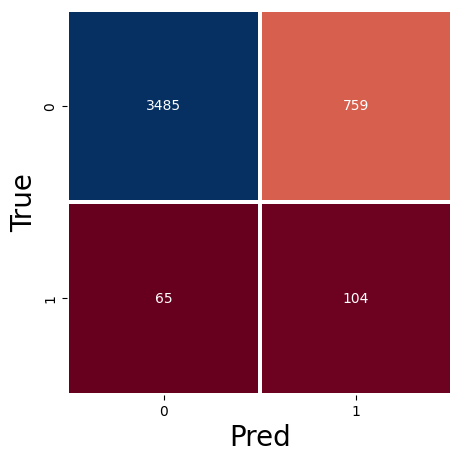

acc = 0.8132789485610695
precision = 0.1205098493626883
TPR = 0.6153846153846154
FAR = 0.1788407163053723
FRR = 0.38461538461538464


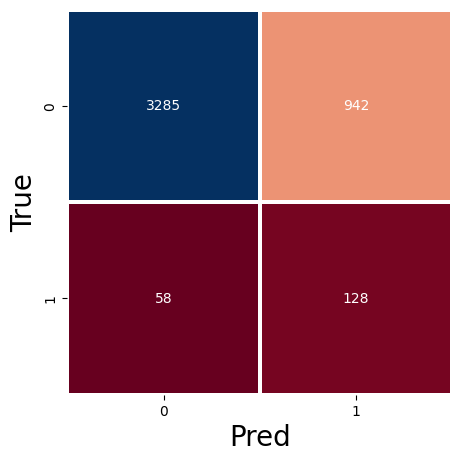

acc = 0.7733967822343077
precision = 0.11962616822429907
TPR = 0.6881720430107527
FAR = 0.22285308729595457
FRR = 0.3118279569892473


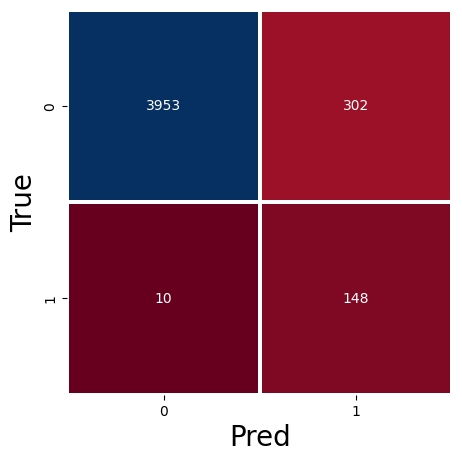

acc = 0.929299796057104
precision = 0.3288888888888889
TPR = 0.9367088607594937
FAR = 0.07097532314923619
FRR = 0.06329113924050633


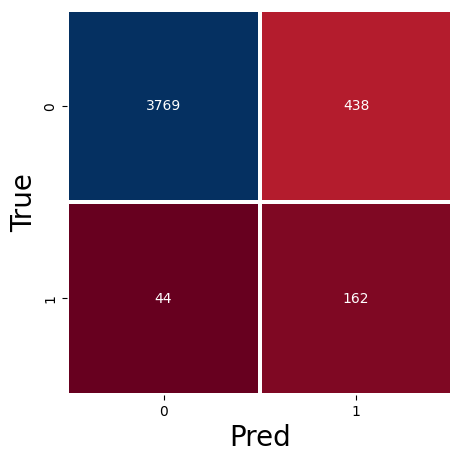

acc = 0.8907772490369363
precision = 0.27
TPR = 0.7864077669902912
FAR = 0.10411219396244355
FRR = 0.21359223300970873


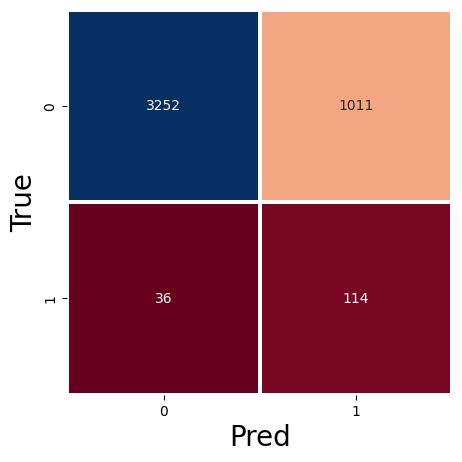

acc = 0.7627464309993202
precision = 0.10133333333333333
TPR = 0.76
FAR = 0.23715693173821253
FRR = 0.24


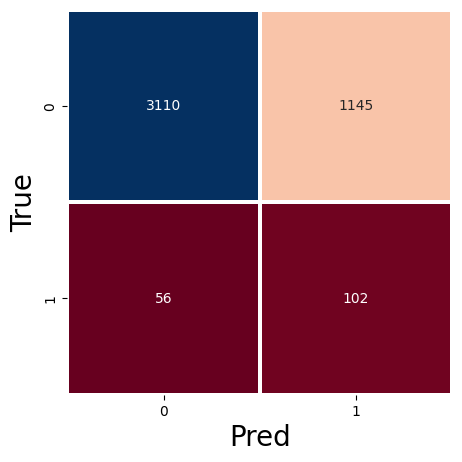

acc = 0.7278495354634036
precision = 0.0817963111467522
TPR = 0.6455696202531646
FAR = 0.2690951821386604
FRR = 0.35443037974683544


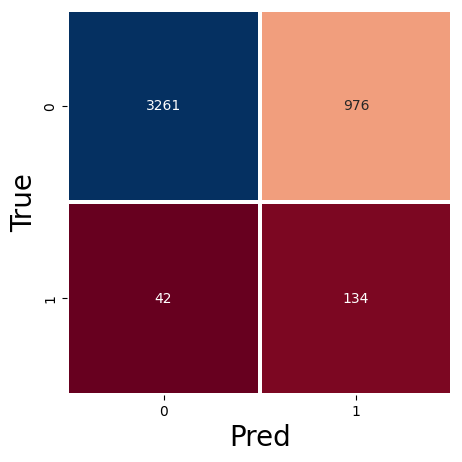

acc = 0.7693179243145253
precision = 0.12072072072072072
TPR = 0.7613636363636364
FAR = 0.2303516639131461
FRR = 0.23863636363636365


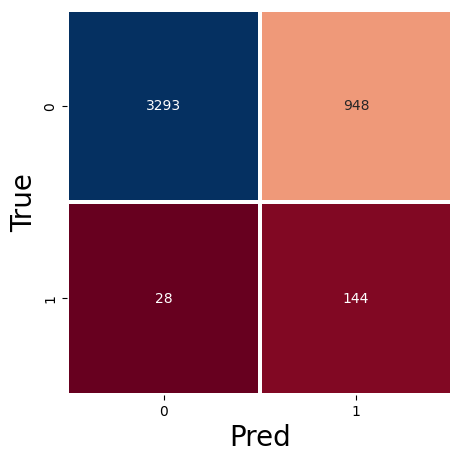

acc = 0.7788352594606843
precision = 0.13186813186813187
TPR = 0.8372093023255814
FAR = 0.22353218580523462
FRR = 0.16279069767441862
average acc = 0.8113577473669692
average precision = 0.16647058481923888
average TPR = 0.7112171323334661
average FAR = 0.1839906267631917
average FRR = 0.2887828676665339
average EER = 0.22353218580523462


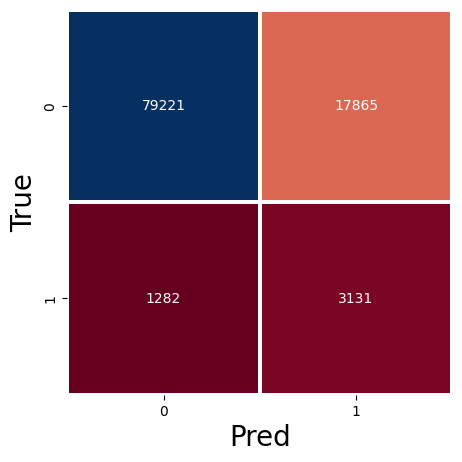

In [6]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        #X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
        X_re, y_re = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train.astype('int'))
        knn = KNeighborsClassifier(n_neighbors=2)

        knn.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = knn.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


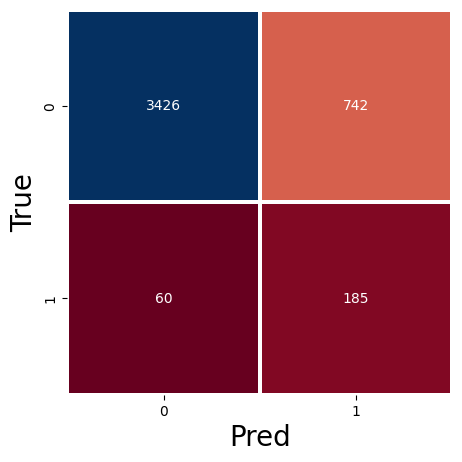

acc = 0.8182642193519148
precision = 0.19956850053937433
TPR = 0.7551020408163265
FAR = 0.17802303262955854
FRR = 0.24489795918367346


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


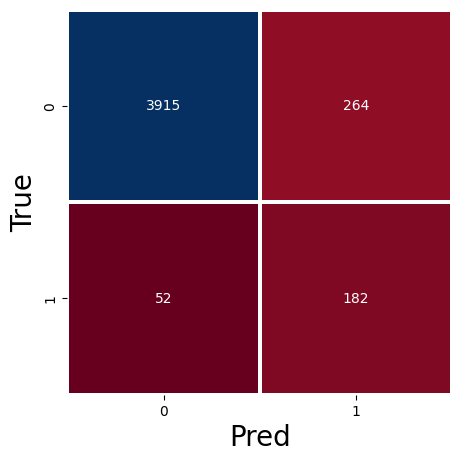

acc = 0.9283933831860413
precision = 0.4080717488789238
TPR = 0.7777777777777778
FAR = 0.06317300789662599
FRR = 0.2222222222222222


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


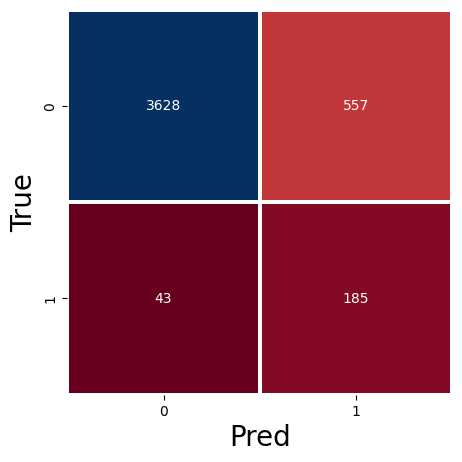

acc = 0.8640380693405847
precision = 0.24932614555256064
TPR = 0.8114035087719298
FAR = 0.13309438470728793
FRR = 0.18859649122807018


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


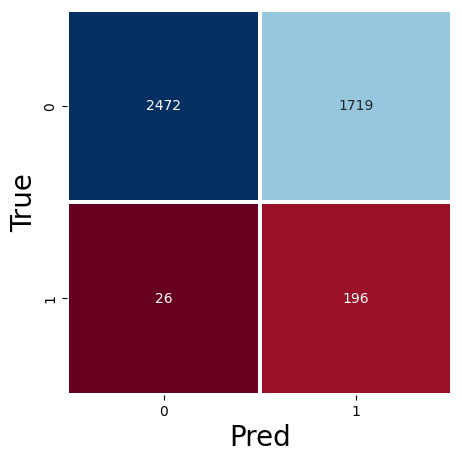

acc = 0.6045773849988669
precision = 0.10234986945169713
TPR = 0.8828828828828829
FAR = 0.4101646385110952
FRR = 0.11711711711711711


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

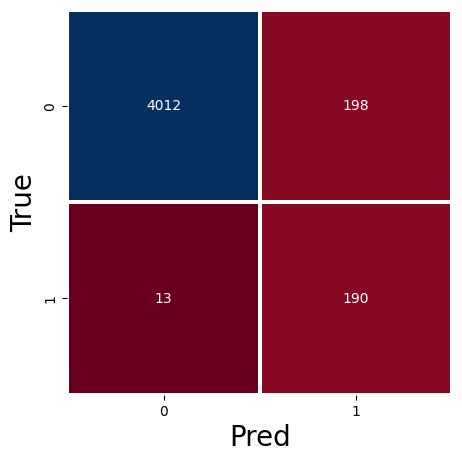

acc = 0.952186721051439
precision = 0.4896907216494845
TPR = 0.9359605911330049
FAR = 0.04703087885985748
FRR = 0.06403940886699508


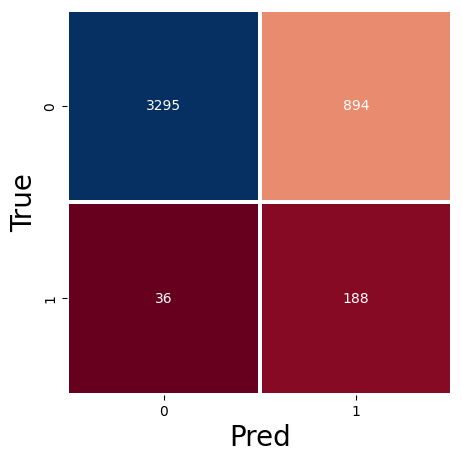

acc = 0.7892590074779062
precision = 0.17375231053604437
TPR = 0.8392857142857143
FAR = 0.21341608975889234
FRR = 0.16071428571428573


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

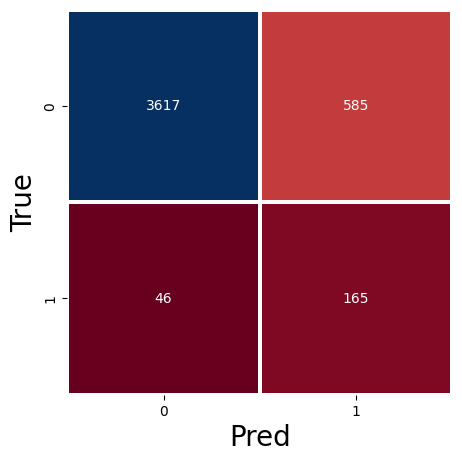

acc = 0.8570133695898482
precision = 0.22
TPR = 0.7819905213270142
FAR = 0.13921941932413137
FRR = 0.21800947867298578


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


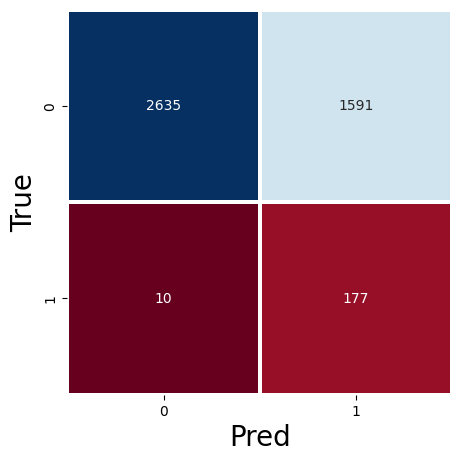

acc = 0.6372082483571266
precision = 0.1001131221719457
TPR = 0.946524064171123
FAR = 0.37647893989588266
FRR = 0.053475935828877004


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


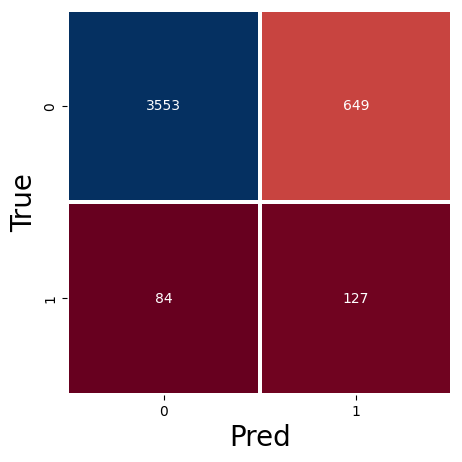

acc = 0.8338998413777475
precision = 0.163659793814433
TPR = 0.6018957345971564
FAR = 0.1544502617801047
FRR = 0.3981042654028436


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


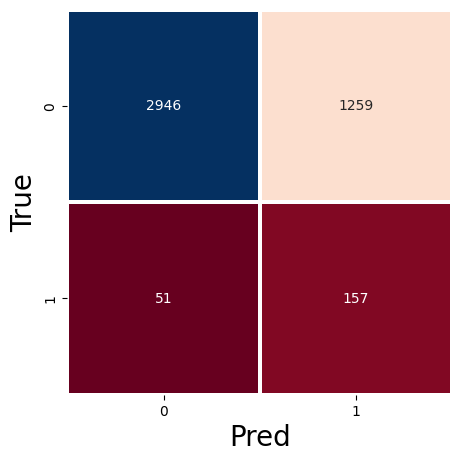

acc = 0.7031497847269431
precision = 0.11087570621468927
TPR = 0.7548076923076923
FAR = 0.29940546967895365
FRR = 0.24519230769230768


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


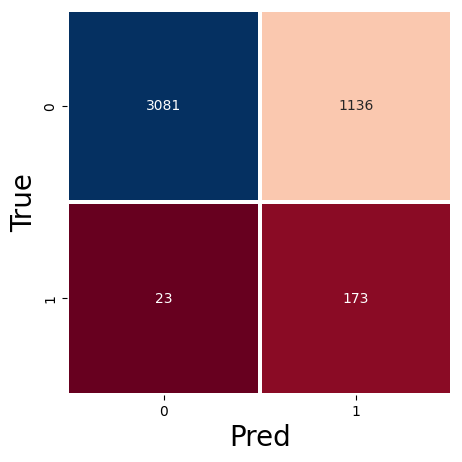

acc = 0.7373668706095626
precision = 0.13216195569136746
TPR = 0.8826530612244898
FAR = 0.2693858193028219
FRR = 0.11734693877551021


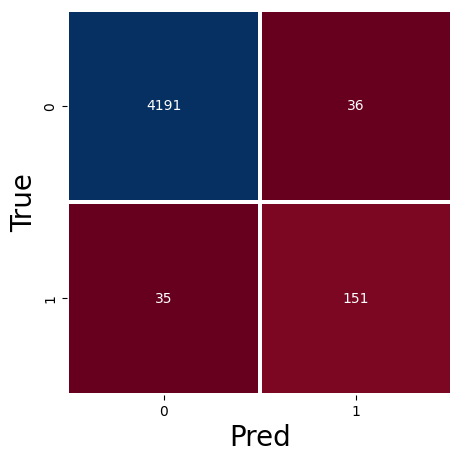

acc = 0.9839111715386358
precision = 0.8074866310160428
TPR = 0.8118279569892473
FAR = 0.008516678495386799
FRR = 0.1881720430107527


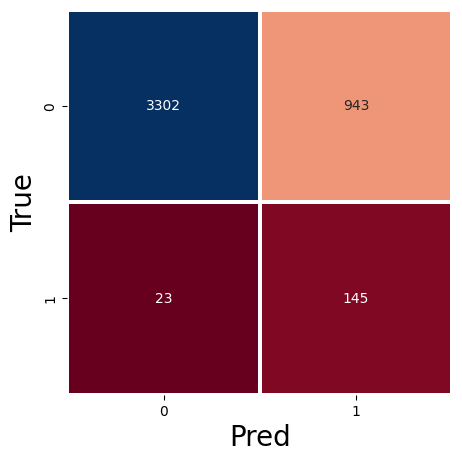

acc = 0.7811012916383413
precision = 0.1332720588235294
TPR = 0.8630952380952381
FAR = 0.22214369846878682
FRR = 0.13690476190476192


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


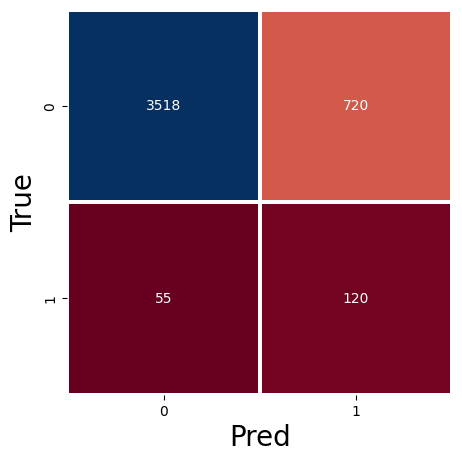

acc = 0.8243825062315885
precision = 0.14285714285714285
TPR = 0.6857142857142857
FAR = 0.16989145823501653
FRR = 0.3142857142857143


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


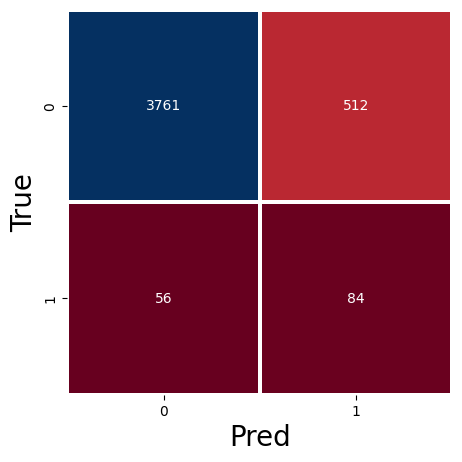

acc = 0.8712893723090868
precision = 0.14093959731543623
TPR = 0.6
FAR = 0.11982213901240346
FRR = 0.4


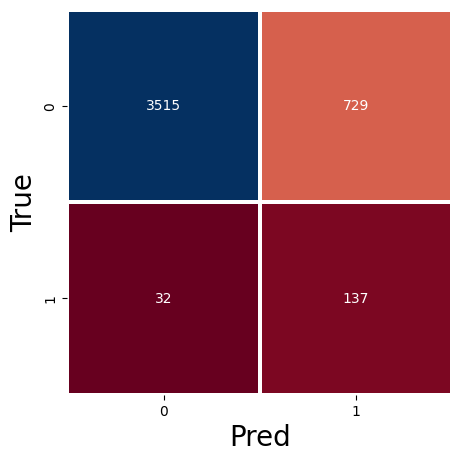

acc = 0.8275549512803082
precision = 0.1581986143187067
TPR = 0.8106508875739645
FAR = 0.17177191328934968
FRR = 0.1893491124260355


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


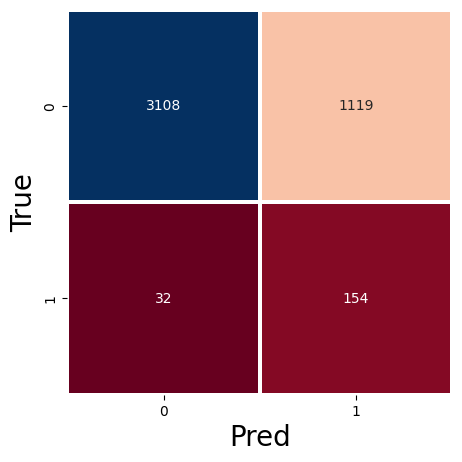

acc = 0.7391796963516882
precision = 0.12097407698350353
TPR = 0.8279569892473119
FAR = 0.26472675656493966
FRR = 0.17204301075268819


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


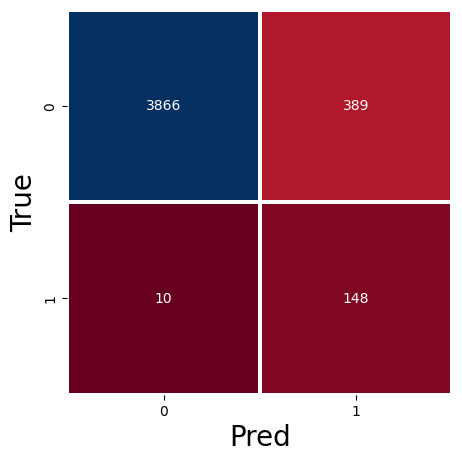

acc = 0.9095853161114887
precision = 0.2756052141527002
TPR = 0.9367088607594937
FAR = 0.09142185663924794
FRR = 0.06329113924050633


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


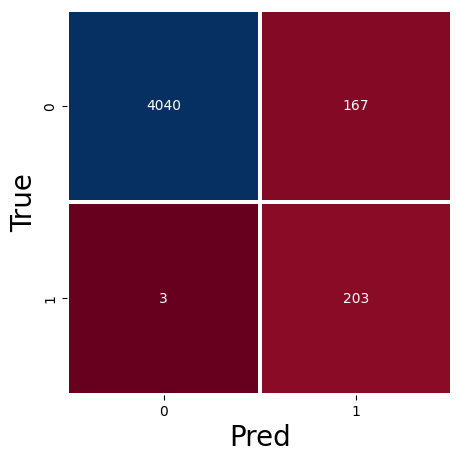

acc = 0.9614774529798323
precision = 0.5486486486486486
TPR = 0.9854368932038835
FAR = 0.03969574518659377
FRR = 0.014563106796116505


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


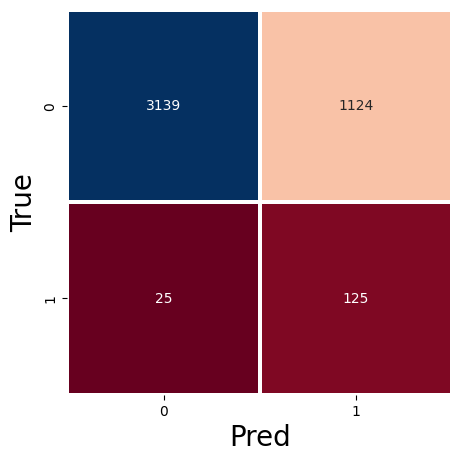

acc = 0.7396329027872196
precision = 0.100080064051241
TPR = 0.8333333333333334
FAR = 0.26366408632418487
FRR = 0.16666666666666666


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


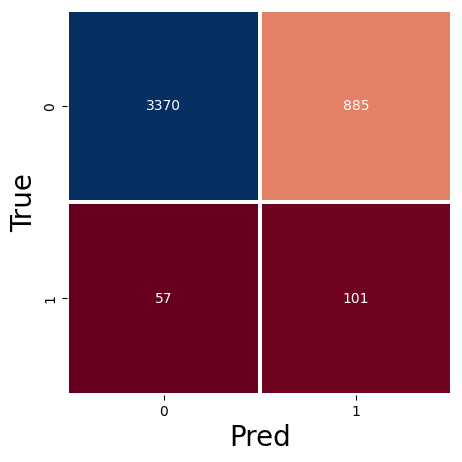

acc = 0.7865397688647179
precision = 0.10243407707910751
TPR = 0.6392405063291139
FAR = 0.20799059929494712
FRR = 0.36075949367088606


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


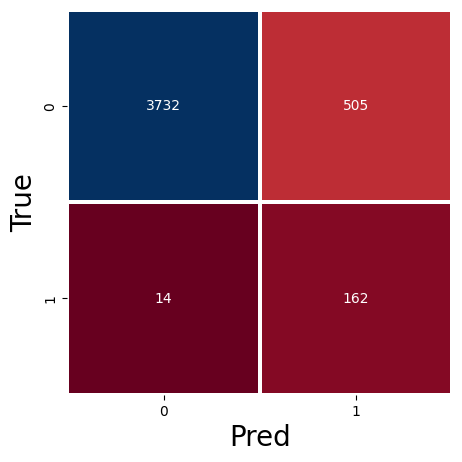

acc = 0.8823929299796057
precision = 0.24287856071964017
TPR = 0.9204545454545454
FAR = 0.11918810479112579
FRR = 0.07954545454545454


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


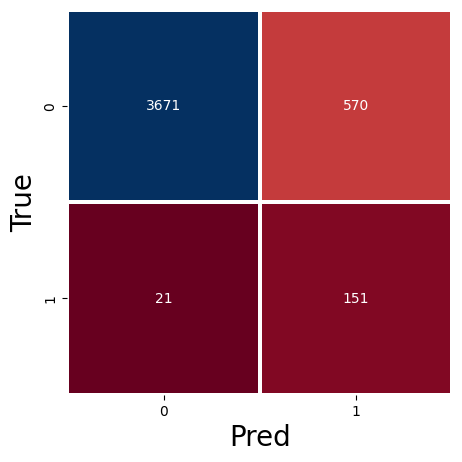

acc = 0.8660774983004759
precision = 0.20943134535367544
TPR = 0.877906976744186
FAR = 0.13440226361707144
FRR = 0.12209302325581395
average acc = 0.8216731199322161
average precision = 0.2318424306878215
average TPR = 0.8157656549017267
average FAR = 0.17813379314192457
average FRR = 0.18423434509827322
average EER = 0.13440226361707144


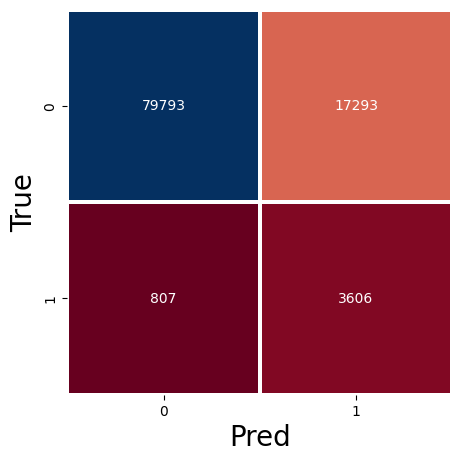

In [7]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        #X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
        X_re, y_re = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train.astype('int'))
        MLP = MLPClassifier(hidden_layer_sizes=(100,10))

        MLP.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = MLP.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


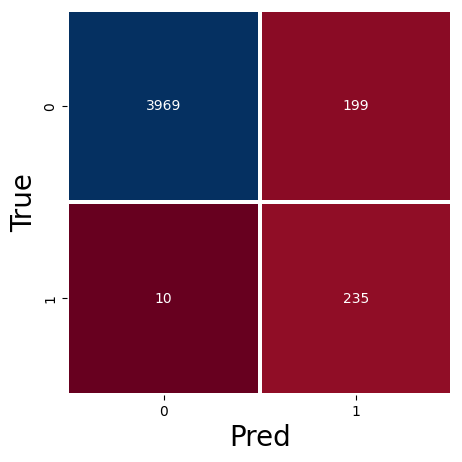

acc = 0.9526399274869704
precision = 0.5414746543778802
TPR = 0.9591836734693877
FAR = 0.0477447216890595
FRR = 0.04081632653061224


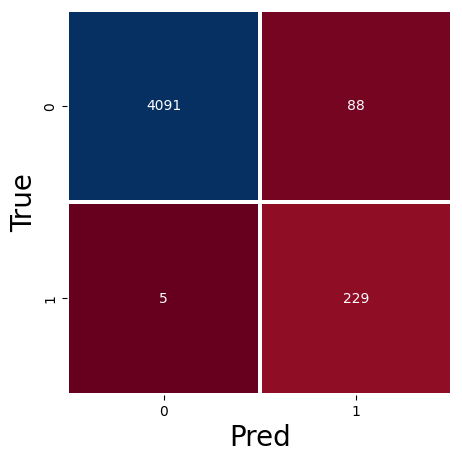

acc = 0.9789259007477906
precision = 0.722397476340694
TPR = 0.9786324786324786
FAR = 0.02105766929887533
FRR = 0.021367521367521368


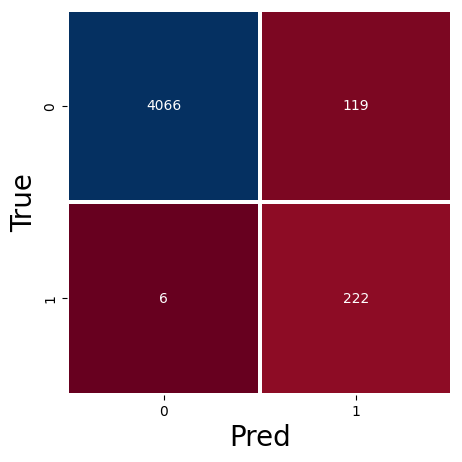

acc = 0.9716745977792884
precision = 0.6510263929618768
TPR = 0.9736842105263158
FAR = 0.02843488649940263
FRR = 0.02631578947368421


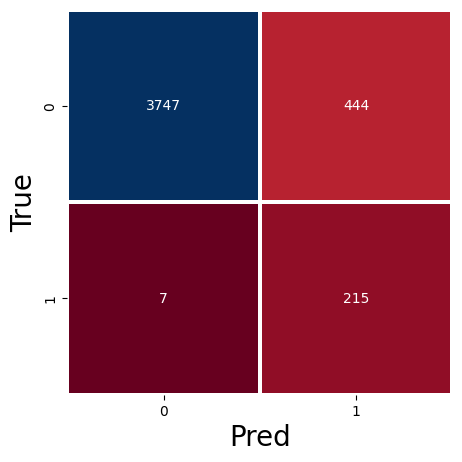

acc = 0.8978019487876728
precision = 0.3262518968133536
TPR = 0.9684684684684685
FAR = 0.10594130279169649
FRR = 0.03153153153153153


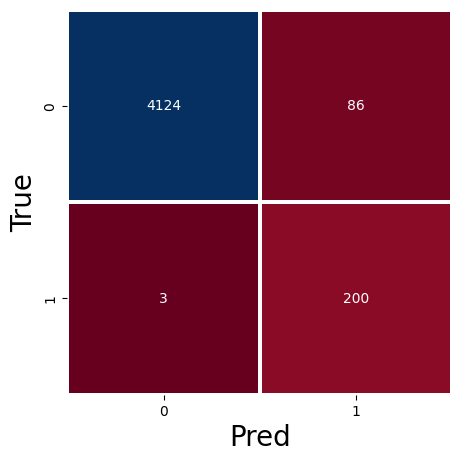

acc = 0.9798323136188534
precision = 0.6993006993006993
TPR = 0.9852216748768473
FAR = 0.020427553444180523
FRR = 0.014778325123152709


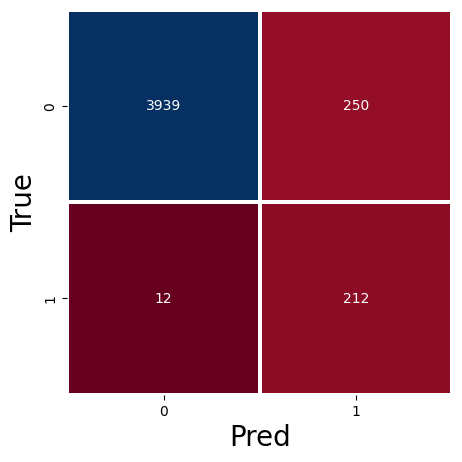

acc = 0.9406299569453886
precision = 0.4588744588744589
TPR = 0.9464285714285714
FAR = 0.05968011458582
FRR = 0.05357142857142857


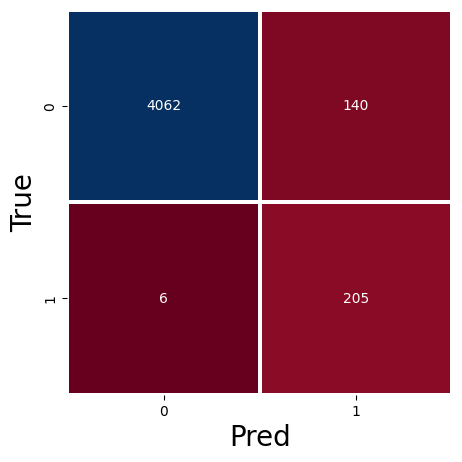

acc = 0.9669159302062089
precision = 0.5942028985507246
TPR = 0.9715639810426541
FAR = 0.03331746787244169
FRR = 0.02843601895734597


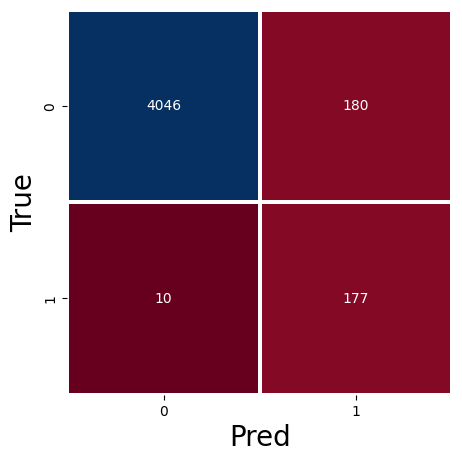

acc = 0.9569453886245185
precision = 0.4957983193277311
TPR = 0.946524064171123
FAR = 0.04259346900141978
FRR = 0.053475935828877004


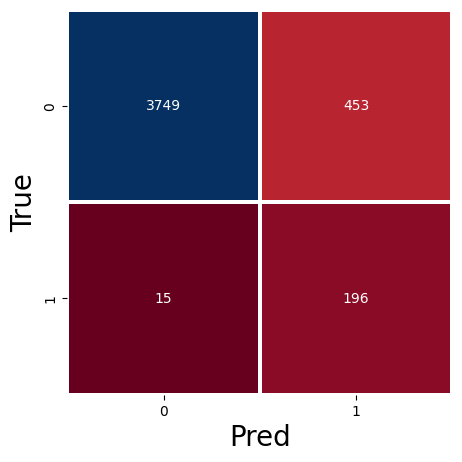

acc = 0.893949694085656
precision = 0.3020030816640986
TPR = 0.9289099526066351
FAR = 0.10780580675868634
FRR = 0.07109004739336493


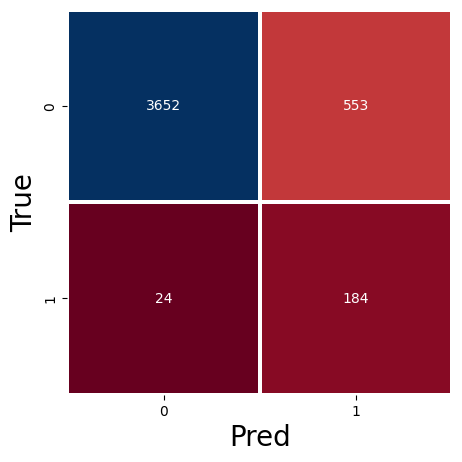

acc = 0.8692499433491956
precision = 0.2496607869742198
TPR = 0.8846153846153846
FAR = 0.1315101070154578
FRR = 0.11538461538461539


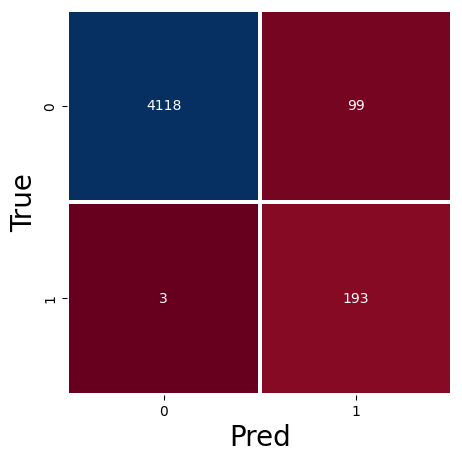

acc = 0.9768864717878993
precision = 0.660958904109589
TPR = 0.9846938775510204
FAR = 0.02347640502727057
FRR = 0.015306122448979591


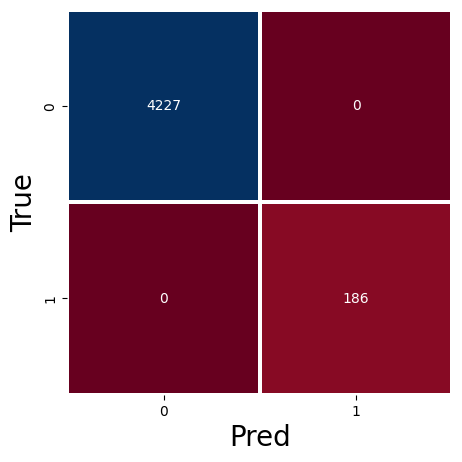

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


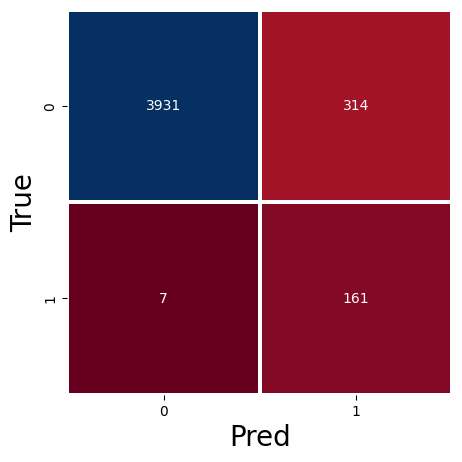

acc = 0.9272603670972128
precision = 0.3389473684210526
TPR = 0.9583333333333334
FAR = 0.07396937573616019
FRR = 0.041666666666666664


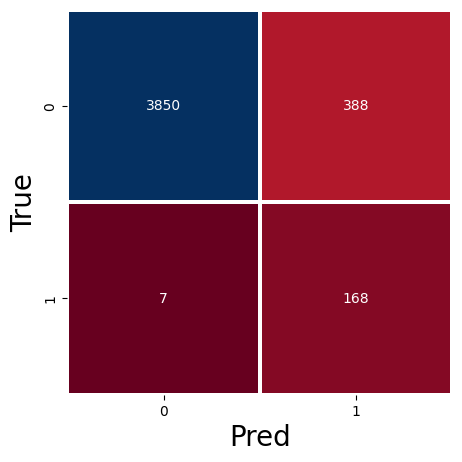

acc = 0.9104917289825516
precision = 0.302158273381295
TPR = 0.96
FAR = 0.09155261915998113
FRR = 0.04


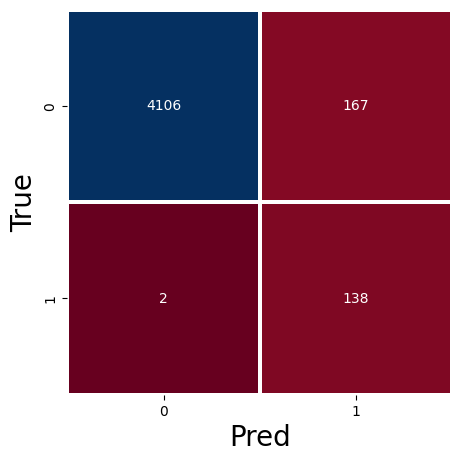

acc = 0.961704056197598
precision = 0.4524590163934426
TPR = 0.9857142857142858
FAR = 0.03908261174818629
FRR = 0.014285714285714285


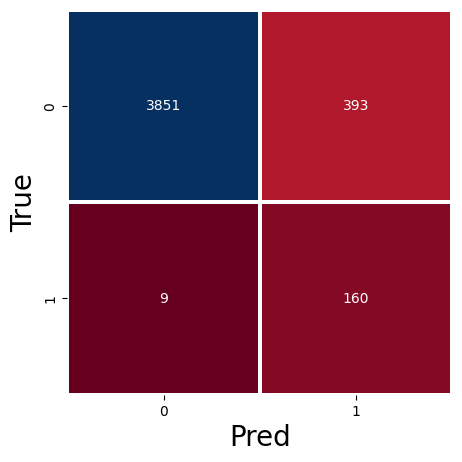

acc = 0.9089055064581917
precision = 0.28933092224231466
TPR = 0.9467455621301775
FAR = 0.09260131950989632
FRR = 0.05325443786982249


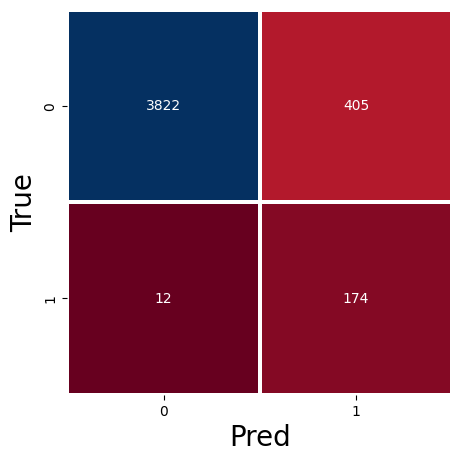

acc = 0.9055064581917063
precision = 0.3005181347150259
TPR = 0.9354838709677419
FAR = 0.09581263307310149
FRR = 0.06451612903225806


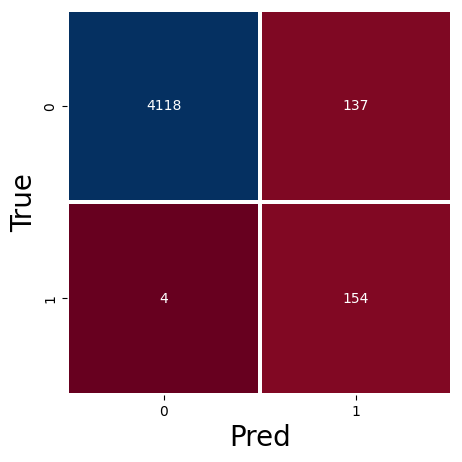

acc = 0.9680489462950373
precision = 0.5292096219931272
TPR = 0.9746835443037974
FAR = 0.03219741480611046
FRR = 0.02531645569620253


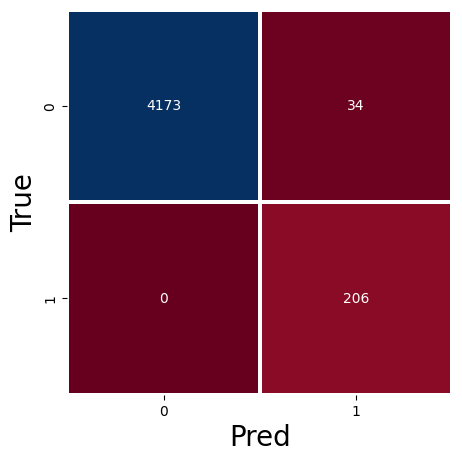

acc = 0.9922954905959664
precision = 0.8583333333333333
TPR = 1.0
FAR = 0.008081768481102924
FRR = 0.0


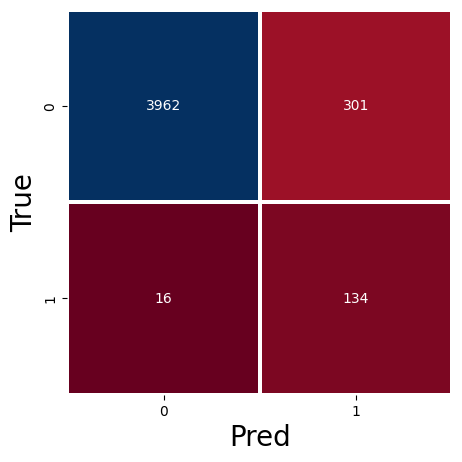

acc = 0.9281667799682756
precision = 0.3080459770114943
TPR = 0.8933333333333333
FAR = 0.07060755336617405
FRR = 0.10666666666666667


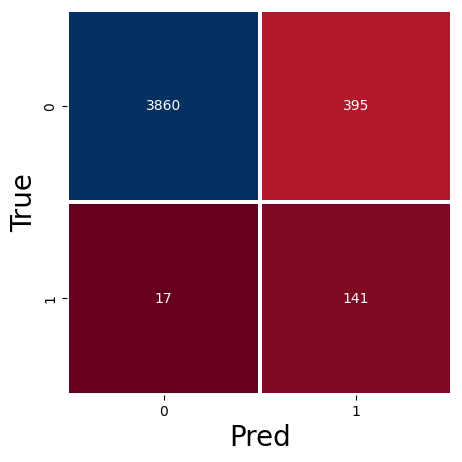

acc = 0.9066394742805348
precision = 0.2630597014925373
TPR = 0.8924050632911392
FAR = 0.09283196239717979
FRR = 0.10759493670886076


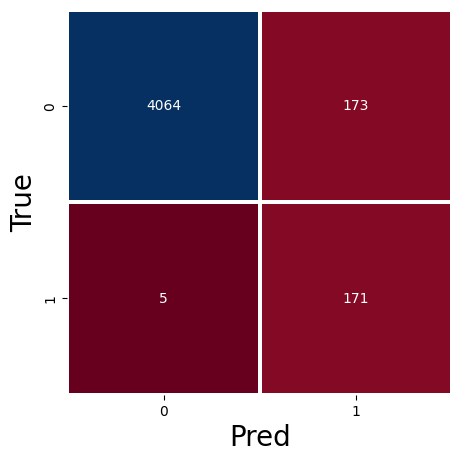

acc = 0.9596646272377067
precision = 0.49709302325581395
TPR = 0.9715909090909091
FAR = 0.04083077649280151
FRR = 0.028409090909090908


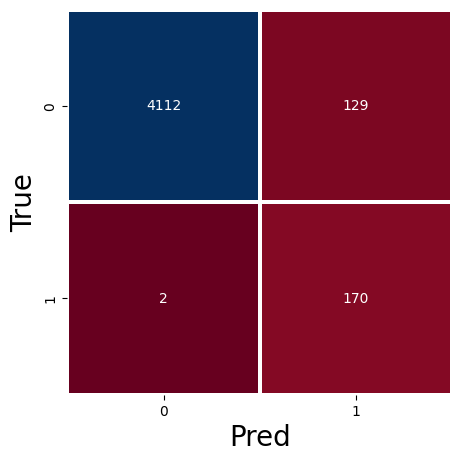

acc = 0.9703149784726943
precision = 0.568561872909699
TPR = 0.9883720930232558
FAR = 0.03041735439754775
FRR = 0.011627906976744186
average acc = 0.9445413255303009
average precision = 0.4960724701932374
average TPR = 0.9580255796772548
average FAR = 0.05608586491967621
average FRR = 0.041974420322745225
average EER = 0.03041735439754775


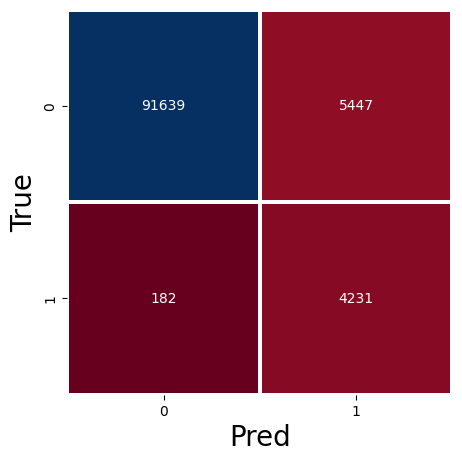

In [8]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        #X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
        X_re, y_re = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train.astype('int'))
        DT = DecisionTreeClassifier(criterion='entropy')

        DT.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = DT.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


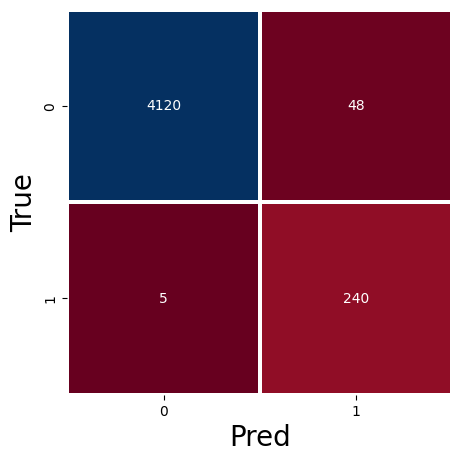

acc = 0.9879900294584183
precision = 0.8333333333333334
TPR = 0.9795918367346939
FAR = 0.011516314779270634
FRR = 0.02040816326530612


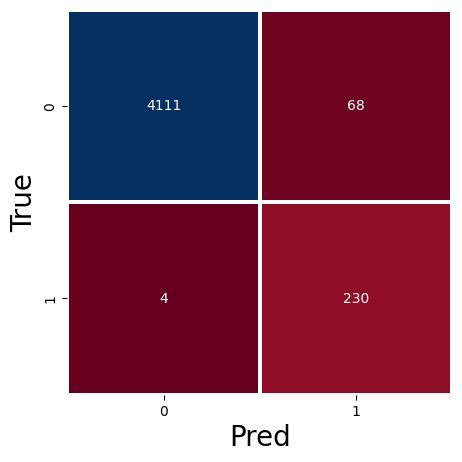

acc = 0.9836845683208701
precision = 0.7718120805369127
TPR = 0.9829059829059829
FAR = 0.016271835367312755
FRR = 0.017094017094017096


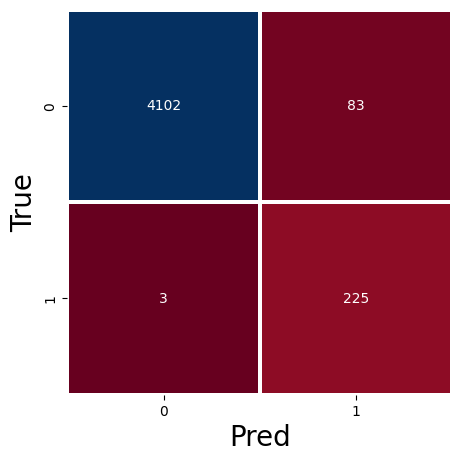

acc = 0.9805121232721504
precision = 0.7305194805194806
TPR = 0.9868421052631579
FAR = 0.01983273596176822
FRR = 0.013157894736842105


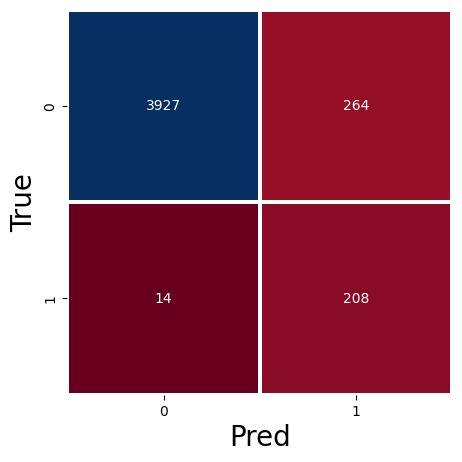

acc = 0.9370043054611376
precision = 0.4406779661016949
TPR = 0.9369369369369369
FAR = 0.06299212598425197
FRR = 0.06306306306306306


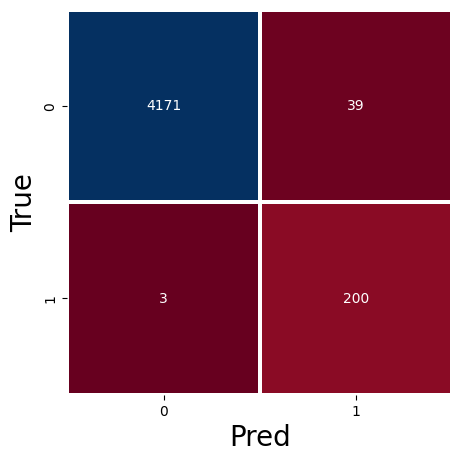

acc = 0.990482664853841
precision = 0.8368200836820083
TPR = 0.9852216748768473
FAR = 0.009263657957244655
FRR = 0.014778325123152709


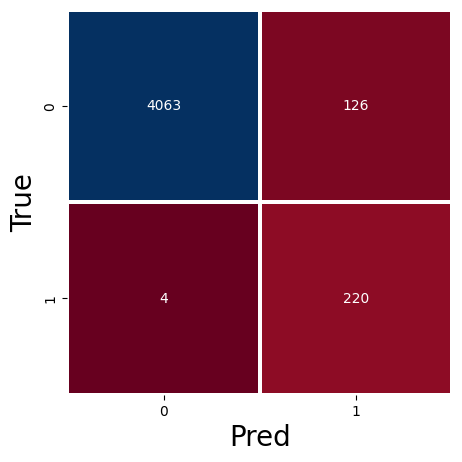

acc = 0.97054158169046
precision = 0.6358381502890174
TPR = 0.9821428571428571
FAR = 0.030078777751253283
FRR = 0.017857142857142856


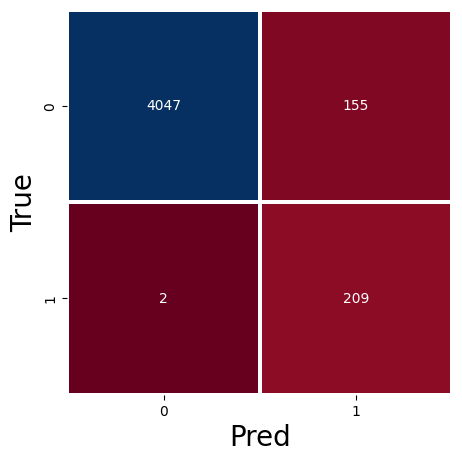

acc = 0.9644232948107863
precision = 0.5741758241758241
TPR = 0.990521327014218
FAR = 0.03688719657306045
FRR = 0.009478672985781991


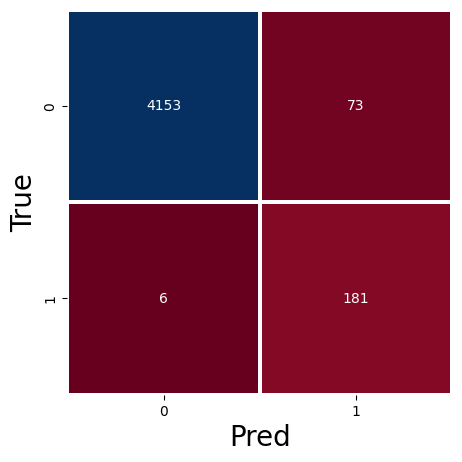

acc = 0.9820983457965103
precision = 0.7125984251968503
TPR = 0.9679144385026738
FAR = 0.017274017983909134
FRR = 0.03208556149732621


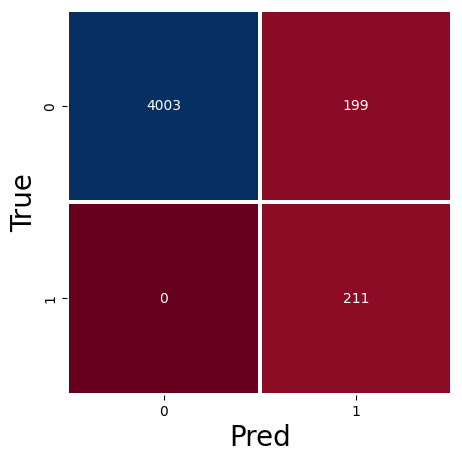

acc = 0.9549059596646272
precision = 0.5146341463414634
TPR = 1.0
FAR = 0.04735840076154212
FRR = 0.0


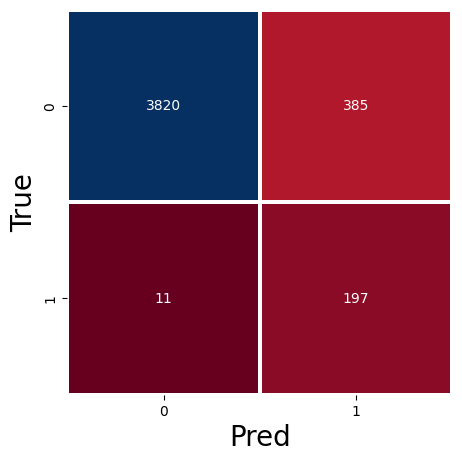

acc = 0.9102651257647859
precision = 0.3384879725085911
TPR = 0.9471153846153846
FAR = 0.09155766944114149
FRR = 0.052884615384615384


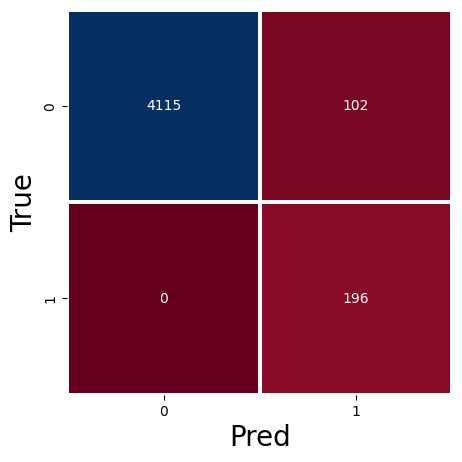

acc = 0.9768864717878993
precision = 0.6577181208053692
TPR = 1.0
FAR = 0.024187811240218165
FRR = 0.0


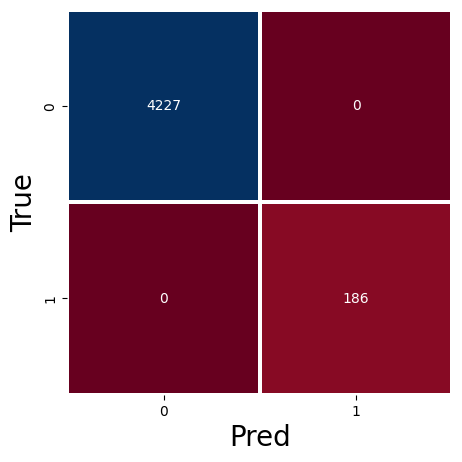

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


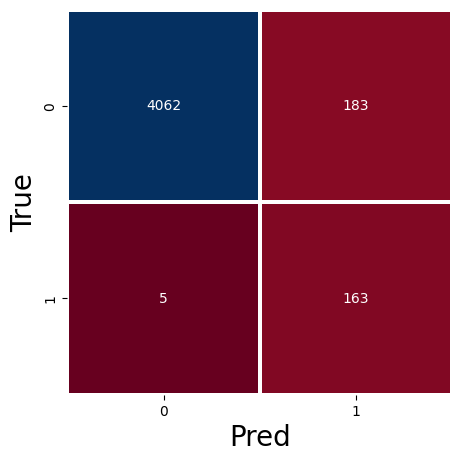

acc = 0.9573985950600499
precision = 0.47109826589595377
TPR = 0.9702380952380952
FAR = 0.0431095406360424
FRR = 0.02976190476190476


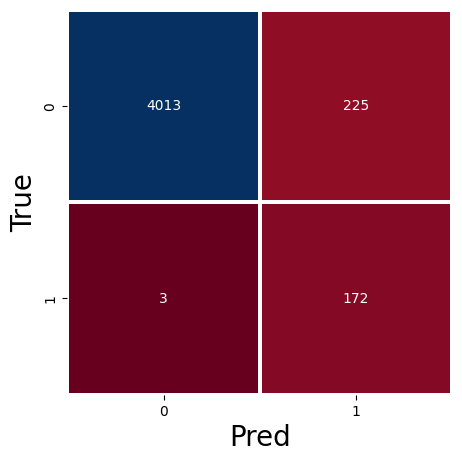

acc = 0.9483344663494222
precision = 0.4332493702770781
TPR = 0.9828571428571429
FAR = 0.053091080698442664
FRR = 0.017142857142857144


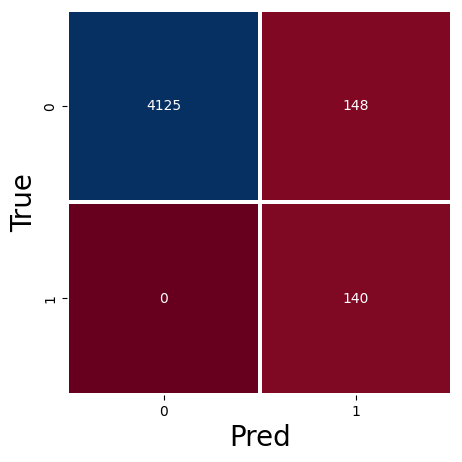

acc = 0.9664627237706775
precision = 0.4861111111111111
TPR = 1.0
FAR = 0.034636087058272876
FRR = 0.0


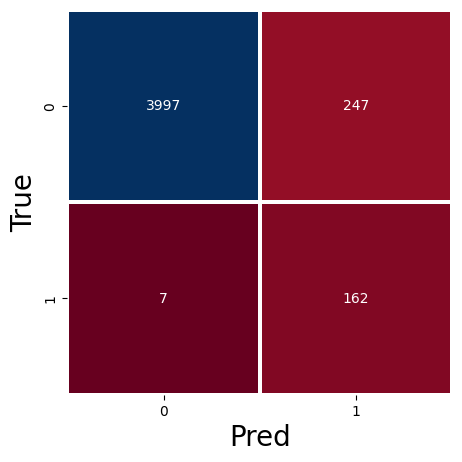

acc = 0.9424427826875141
precision = 0.3960880195599022
TPR = 0.9585798816568047
FAR = 0.05819981149858624
FRR = 0.04142011834319527


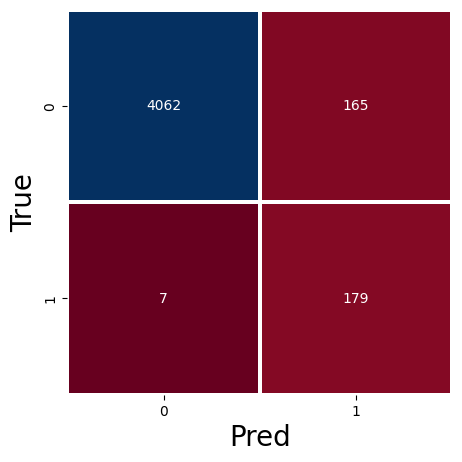

acc = 0.961024246544301
precision = 0.5203488372093024
TPR = 0.9623655913978495
FAR = 0.03903477643718949
FRR = 0.03763440860215054


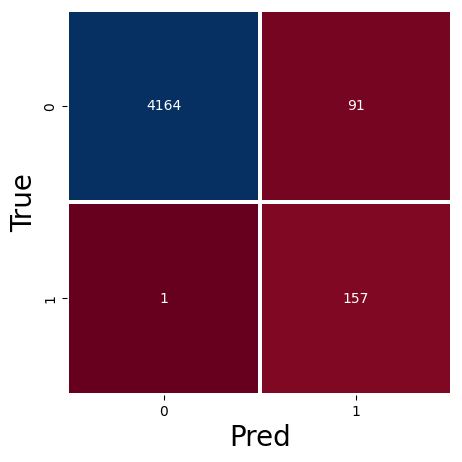

acc = 0.9791525039655563
precision = 0.6330645161290323
TPR = 0.9936708860759493
FAR = 0.02138660399529965
FRR = 0.006329113924050633


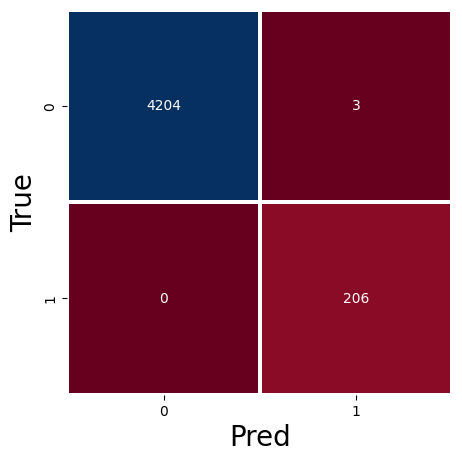

acc = 0.9993201903467029
precision = 0.9856459330143541
TPR = 1.0
FAR = 0.0007130972189208462
FRR = 0.0


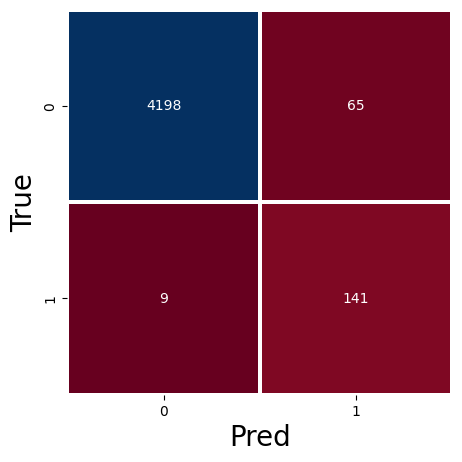

acc = 0.9832313618853388
precision = 0.6844660194174758
TPR = 0.94
FAR = 0.015247478301665493
FRR = 0.06


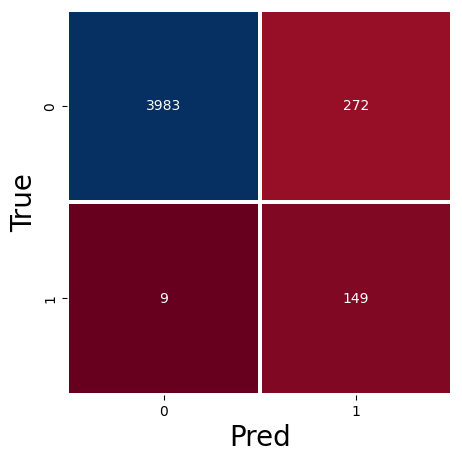

acc = 0.9363244958078405
precision = 0.35391923990498814
TPR = 0.9430379746835443
FAR = 0.06392479435957697
FRR = 0.056962025316455694


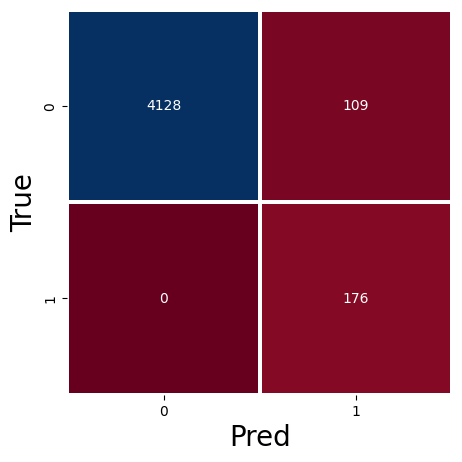

acc = 0.9753002492635395
precision = 0.6175438596491228
TPR = 1.0
FAR = 0.025725749350955864
FRR = 0.0


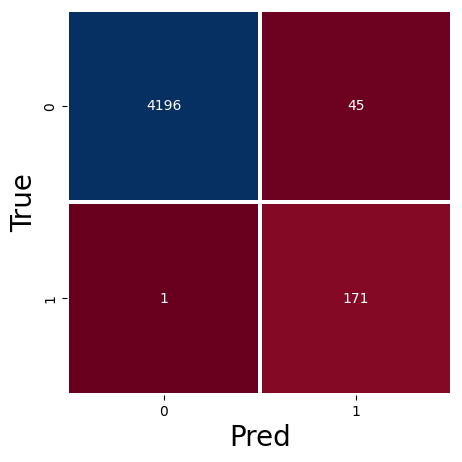

acc = 0.9895762519827782
precision = 0.7916666666666666
TPR = 0.9941860465116279
FAR = 0.010610705022400376
FRR = 0.005813953488372093
average acc = 0.9685809712410961
average precision = 0.626948583579371
average TPR = 0.9784403548875551
average FAR = 0.03186522905992721
average FRR = 0.02155964511244494
average EER = 0.010610705022400376


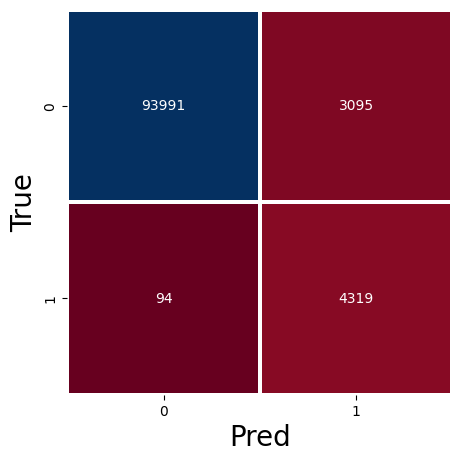

In [9]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

i=0
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        #X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
        X_re, y_re = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train.astype('int'))
        RF = RandomForestClassifier(n_estimators=22)

        RF.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = RF.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))

    '''
    initial_types = [
        ('input_data_type', FloatTensorType([None, 54]))
    ]

    converted_model = convert_sklearn(RF, initial_types=initial_types)
    with open(f"./models/model{i}.onnx", "wb") as f:
        f.write(converted_model.SerializeToString())
    i+=1
    '''
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


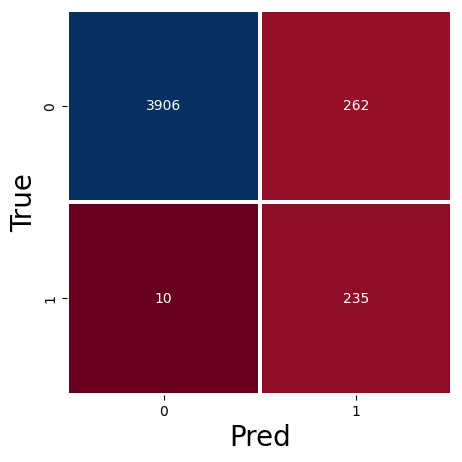

acc = 0.9383639247677317
precision = 0.47283702213279677
TPR = 0.9591836734693877
FAR = 0.0628598848368522
FRR = 0.04081632653061224


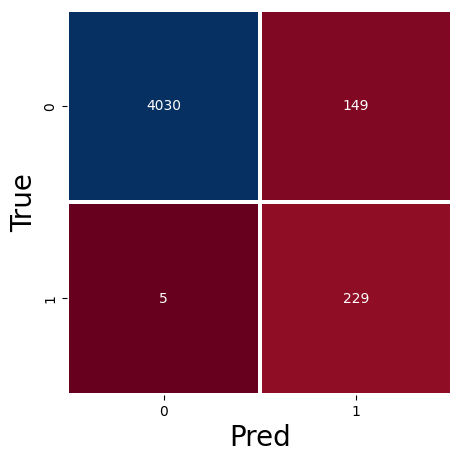

acc = 0.9651031044640834
precision = 0.6058201058201058
TPR = 0.9786324786324786
FAR = 0.03565446279014118
FRR = 0.021367521367521368


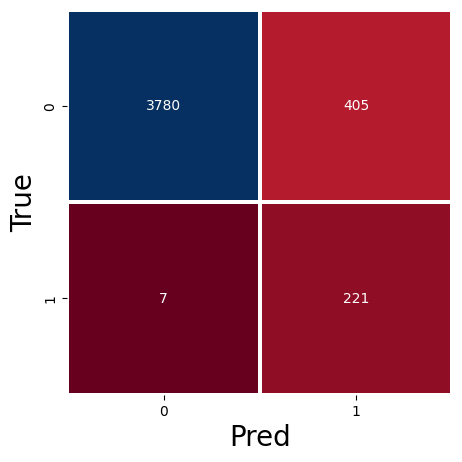

acc = 0.9066394742805348
precision = 0.35303514376996803
TPR = 0.9692982456140351
FAR = 0.0967741935483871
FRR = 0.03070175438596491


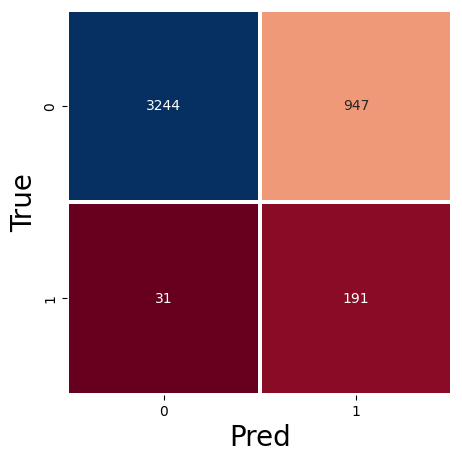

acc = 0.778382053025153
precision = 0.1678383128295255
TPR = 0.8603603603603603
FAR = 0.22596039131472204
FRR = 0.13963963963963963


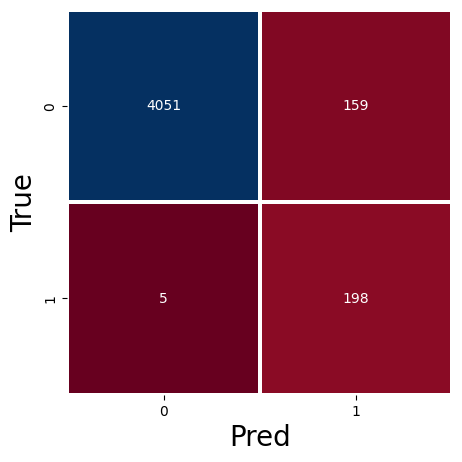

acc = 0.9628370722864265
precision = 0.5546218487394958
TPR = 0.9753694581280788
FAR = 0.03776722090261283
FRR = 0.024630541871921183


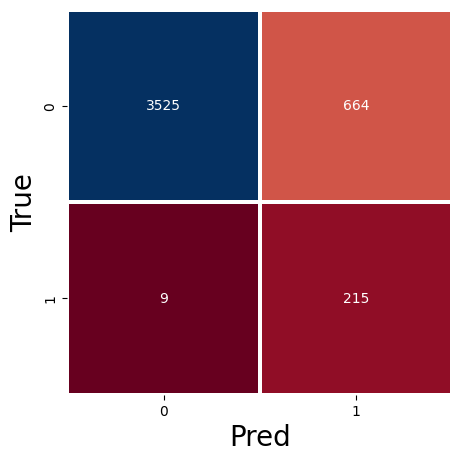

acc = 0.8474960344436892
precision = 0.2445961319681456
TPR = 0.9598214285714286
FAR = 0.15851038433993794
FRR = 0.04017857142857143


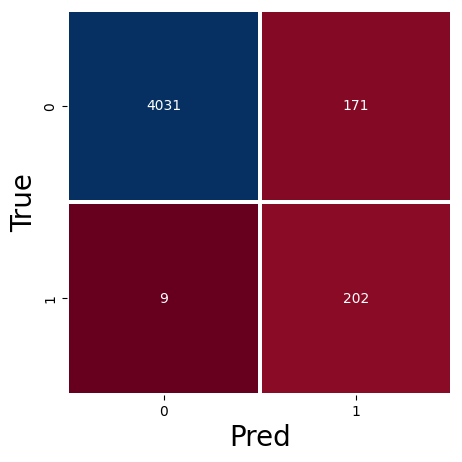

acc = 0.9592114208021754
precision = 0.5415549597855228
TPR = 0.957345971563981
FAR = 0.040694907187053785
FRR = 0.04265402843601896


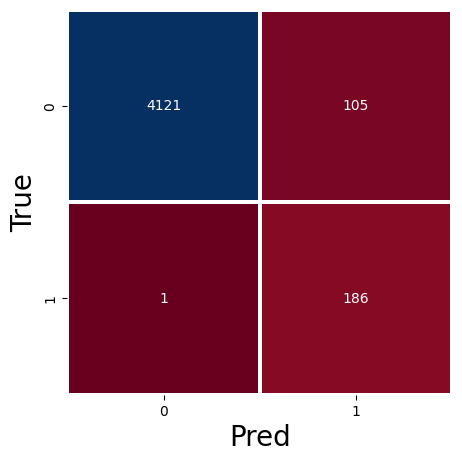

acc = 0.9759800589168366
precision = 0.6391752577319587
TPR = 0.9946524064171123
FAR = 0.024846190250828206
FRR = 0.0053475935828877


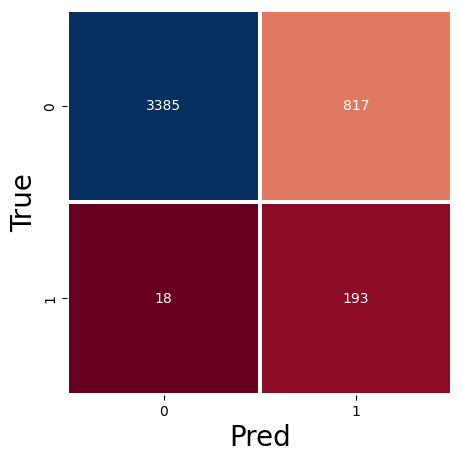

acc = 0.810786313165647
precision = 0.1910891089108911
TPR = 0.9146919431279621
FAR = 0.19443122322703474
FRR = 0.08530805687203792


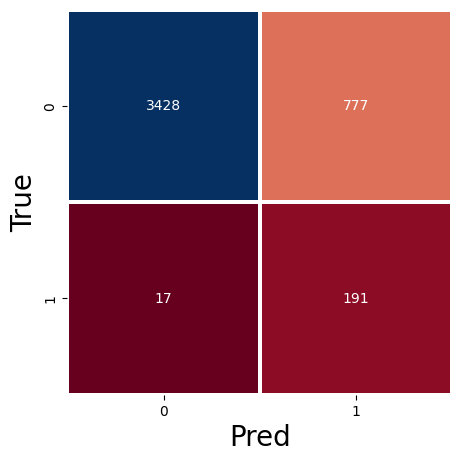

acc = 0.8200770450940403
precision = 0.19731404958677687
TPR = 0.9182692307692307
FAR = 0.18478002378121283
FRR = 0.08173076923076923


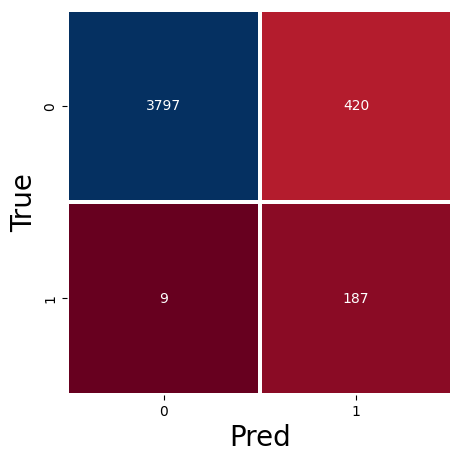

acc = 0.902787219578518
precision = 0.30807248764415157
TPR = 0.9540816326530612
FAR = 0.09959686981266302
FRR = 0.04591836734693878


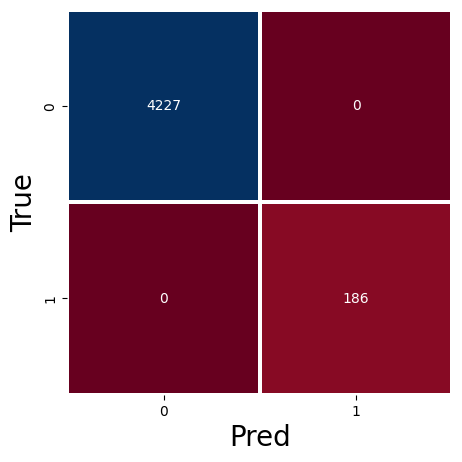

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


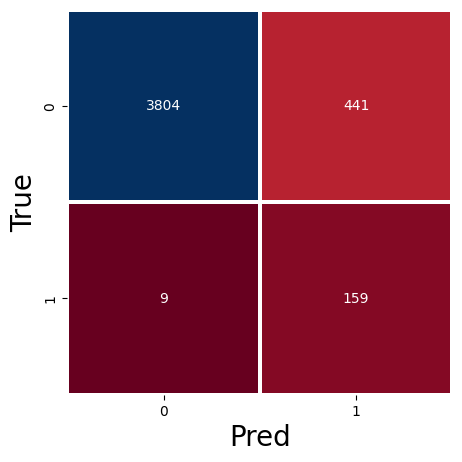

acc = 0.8980285520054385
precision = 0.265
TPR = 0.9464285714285714
FAR = 0.103886925795053
FRR = 0.05357142857142857


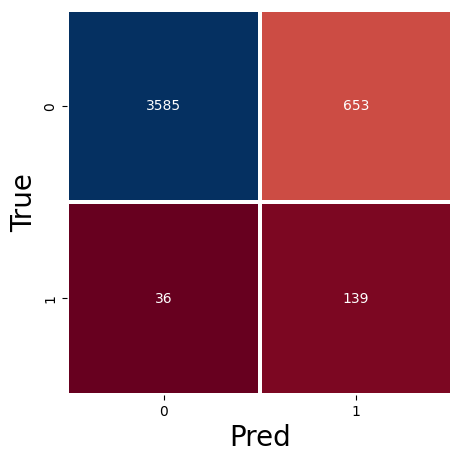

acc = 0.8438703829594381
precision = 0.1755050505050505
TPR = 0.7942857142857143
FAR = 0.1540821142048136
FRR = 0.2057142857142857


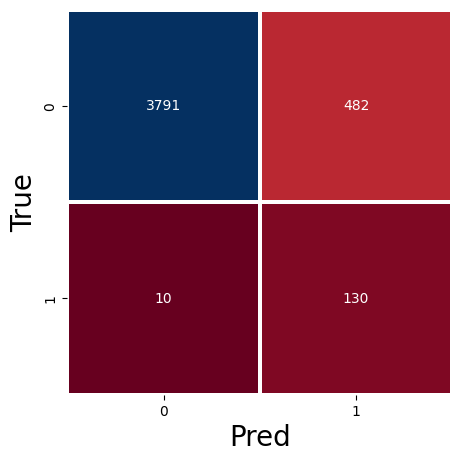

acc = 0.8885112168592794
precision = 0.21241830065359477
TPR = 0.9285714285714286
FAR = 0.11280131055464544
FRR = 0.07142857142857142


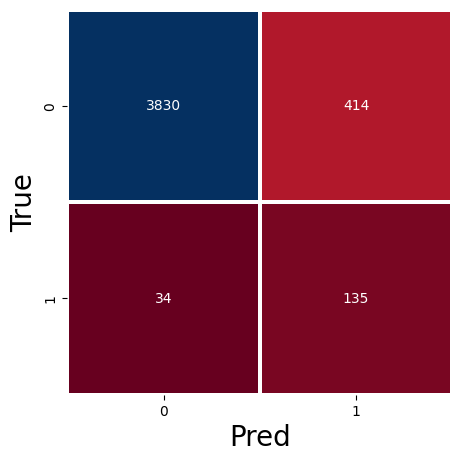

acc = 0.8984817584409699
precision = 0.2459016393442623
TPR = 0.7988165680473372
FAR = 0.09754948162111216
FRR = 0.20118343195266272


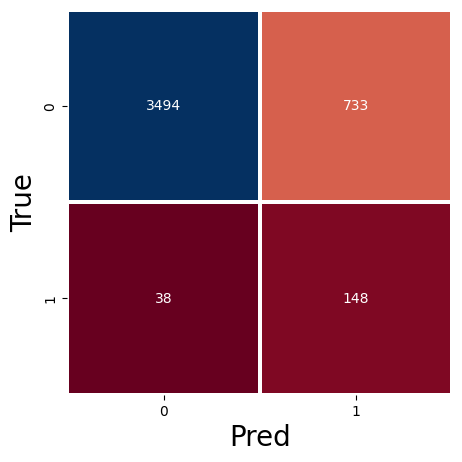

acc = 0.8252889191026512
precision = 0.16799091940976163
TPR = 0.7956989247311828
FAR = 0.17340903714218123
FRR = 0.20430107526881722


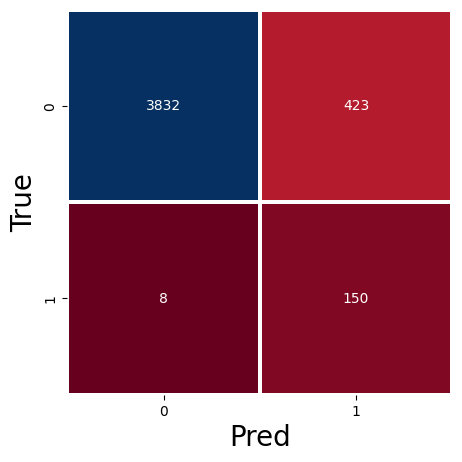

acc = 0.9023340131429867
precision = 0.2617801047120419
TPR = 0.9493670886075949
FAR = 0.09941245593419507
FRR = 0.05063291139240506


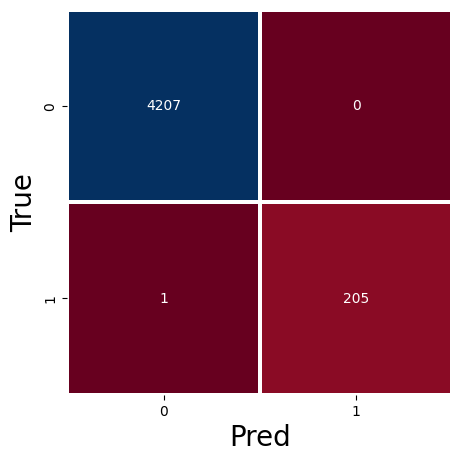

acc = 0.9997733967822343
precision = 1.0
TPR = 0.9951456310679612
FAR = 0.0
FRR = 0.0048543689320388345


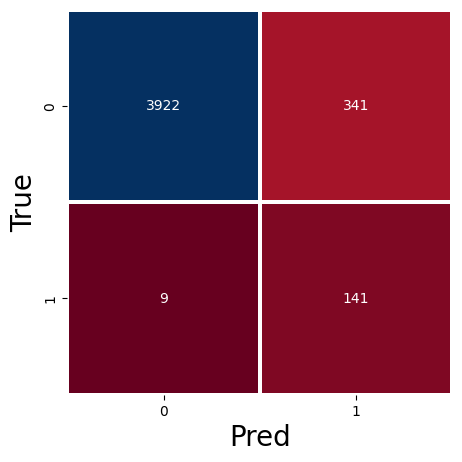

acc = 0.9206888737820077
precision = 0.2925311203319502
TPR = 0.94
FAR = 0.07999061693642974
FRR = 0.06


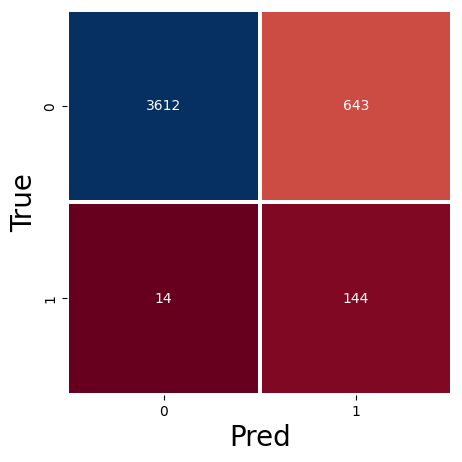

acc = 0.8511216859279401
precision = 0.18297331639135958
TPR = 0.9113924050632911
FAR = 0.1511163337250294
FRR = 0.08860759493670886


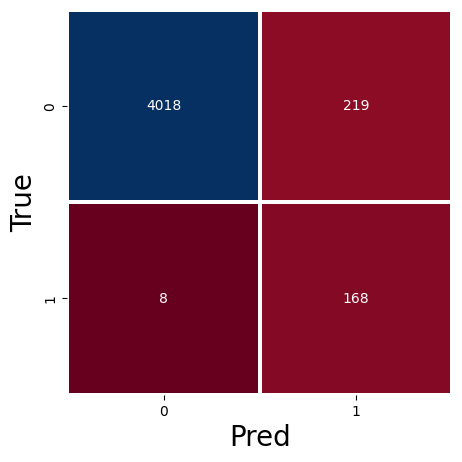

acc = 0.9485610695671879
precision = 0.43410852713178294
TPR = 0.9545454545454546
FAR = 0.05168751475100307
FRR = 0.045454545454545456


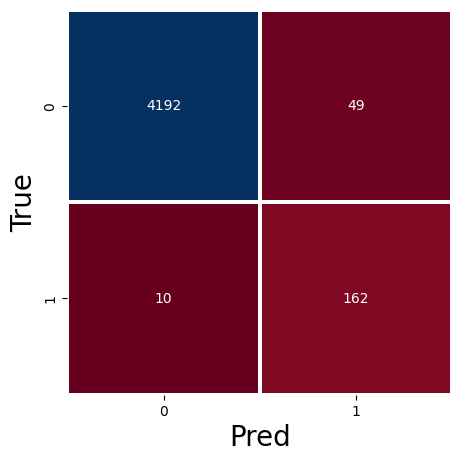

acc = 0.9866304101518242
precision = 0.7677725118483413
TPR = 0.9418604651162791
FAR = 0.0115538788021693
FRR = 0.05813953488372093
average acc = 0.9056936521542085
average precision = 0.40356243127162966
average TPR = 0.9303399600335622
average FAR = 0.09553762701991644
average FRR = 0.06966003996643776
average EER = 0.0115538788021693


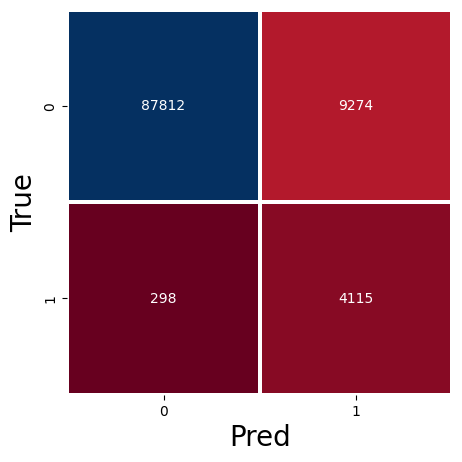

In [10]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        #X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
        X_re, y_re = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train.astype('int'))
        GNB = GaussianNB()

        GNB.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = GNB.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


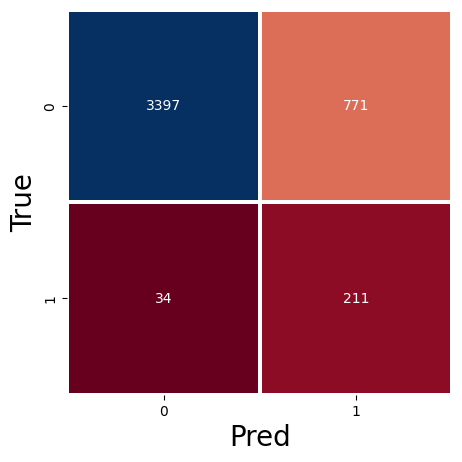

acc = 0.8175844096986177
precision = 0.21486761710794297
TPR = 0.8612244897959184
FAR = 0.18498080614203455
FRR = 0.13877551020408163


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


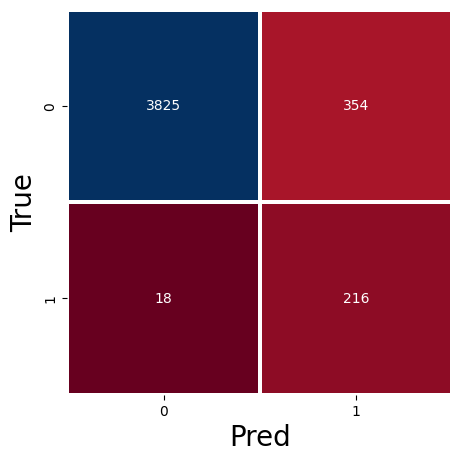

acc = 0.9157036029911625
precision = 0.37894736842105264
TPR = 0.9230769230769231
FAR = 0.08470926058865758
FRR = 0.07692307692307693


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


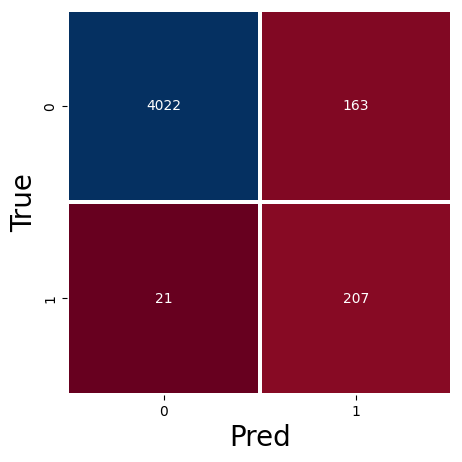

acc = 0.9583050079311126
precision = 0.5594594594594594
TPR = 0.9078947368421053
FAR = 0.03894862604540024
FRR = 0.09210526315789473


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


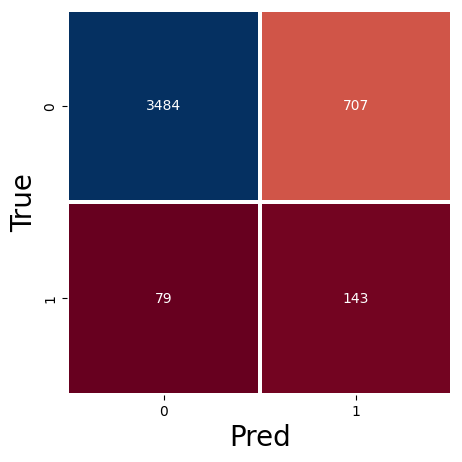

acc = 0.8218898708361658
precision = 0.16823529411764707
TPR = 0.6441441441441441
FAR = 0.16869482223812932
FRR = 0.35585585585585583


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


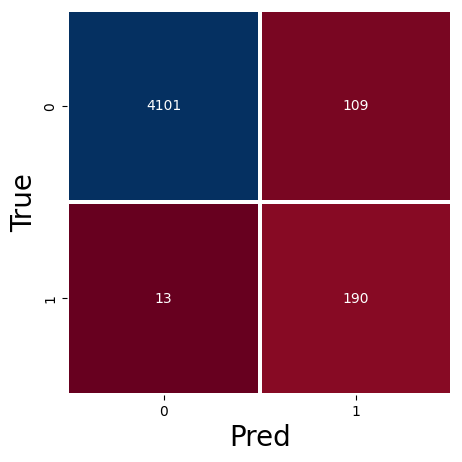

acc = 0.9723544074325855
precision = 0.6354515050167224
TPR = 0.9359605911330049
FAR = 0.025890736342042756
FRR = 0.06403940886699508


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


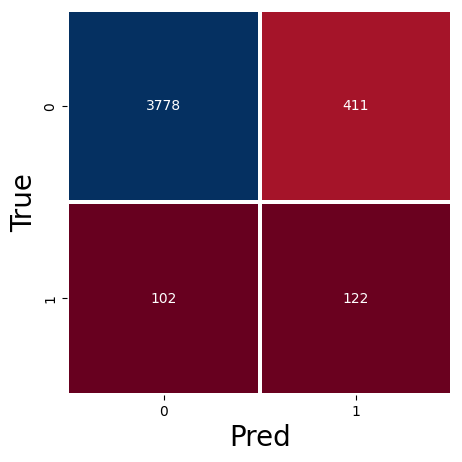

acc = 0.8837525492861998
precision = 0.22889305816135083
TPR = 0.5446428571428571
FAR = 0.09811410837908809
FRR = 0.45535714285714285


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


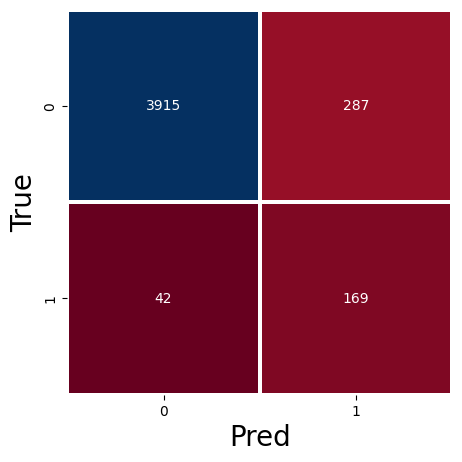

acc = 0.9254475413550872
precision = 0.3706140350877193
TPR = 0.8009478672985783
FAR = 0.06830080913850547
FRR = 0.1990521327014218


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

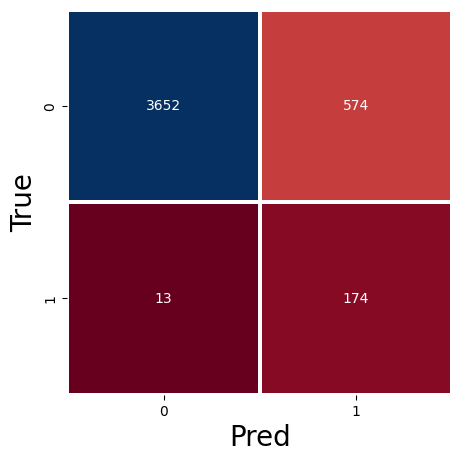

acc = 0.8669839111715386
precision = 0.232620320855615
TPR = 0.93048128342246
FAR = 0.13582584003786086
FRR = 0.06951871657754011


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


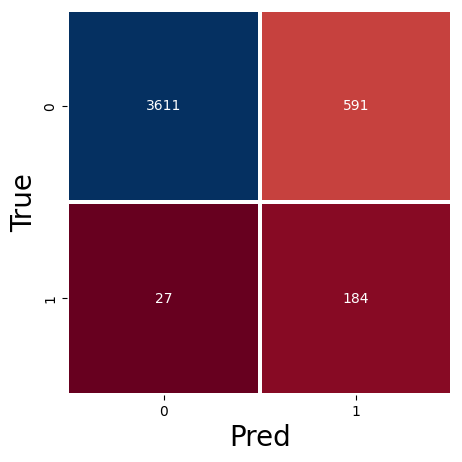

acc = 0.8599592114208022
precision = 0.23741935483870968
TPR = 0.8720379146919431
FAR = 0.14064731080437887
FRR = 0.12796208530805686


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


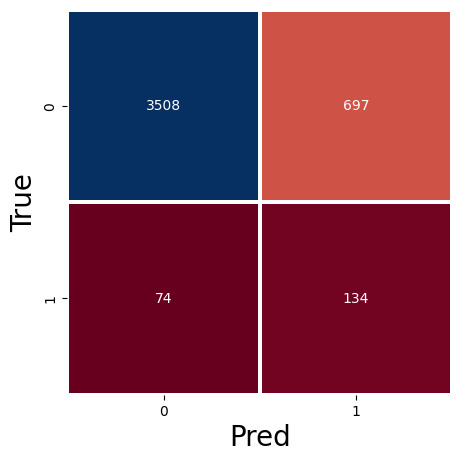

acc = 0.8252889191026512
precision = 0.16125150421179302
TPR = 0.6442307692307693
FAR = 0.1657550535077289
FRR = 0.3557692307692308


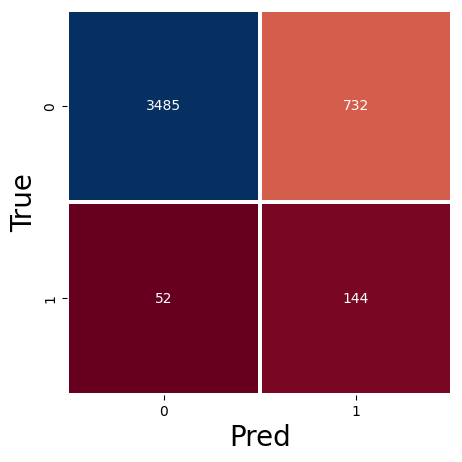

acc = 0.8223430772716973
precision = 0.1643835616438356
TPR = 0.7346938775510204
FAR = 0.17358311595921272
FRR = 0.2653061224489796


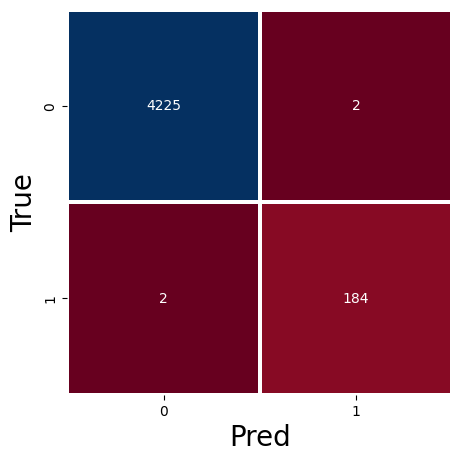

acc = 0.9990935871289373
precision = 0.989247311827957
TPR = 0.989247311827957
FAR = 0.0004731488052992666
FRR = 0.010752688172043012


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


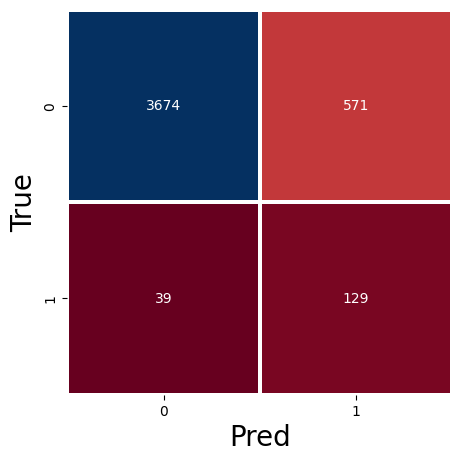

acc = 0.8617720371629277
precision = 0.18428571428571427
TPR = 0.7678571428571429
FAR = 0.13451118963486455
FRR = 0.23214285714285715


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


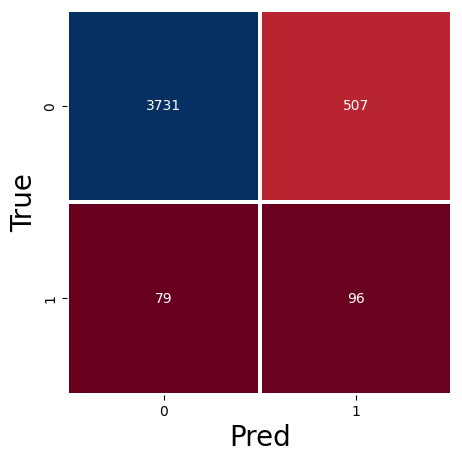

acc = 0.8672105143893043
precision = 0.15920398009950248
TPR = 0.5485714285714286
FAR = 0.1196319018404908
FRR = 0.4514285714285714


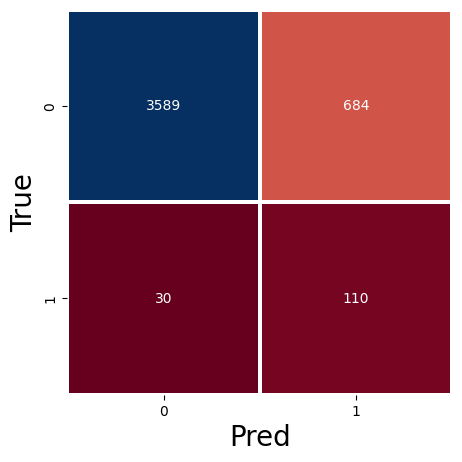

acc = 0.8382053025152957
precision = 0.1385390428211587
TPR = 0.7857142857142857
FAR = 0.16007488883688276
FRR = 0.21428571428571427


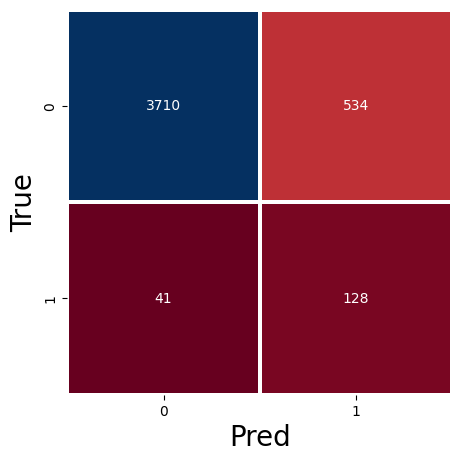

acc = 0.869703149784727
precision = 0.1933534743202417
TPR = 0.757396449704142
FAR = 0.12582469368520263
FRR = 0.24260355029585798


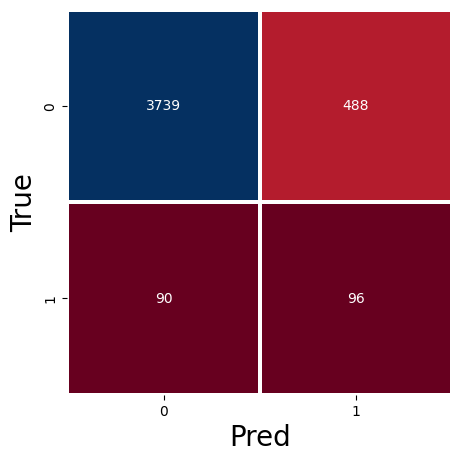

acc = 0.8690233401314299
precision = 0.1643835616438356
TPR = 0.5161290322580645
FAR = 0.11544830849302105
FRR = 0.4838709677419355


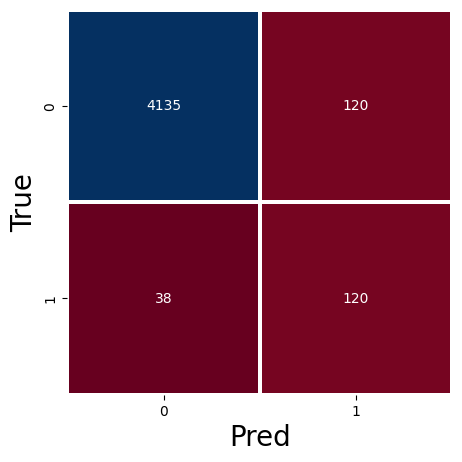

acc = 0.9641966915930206
precision = 0.5
TPR = 0.759493670886076
FAR = 0.0282021151586369
FRR = 0.24050632911392406


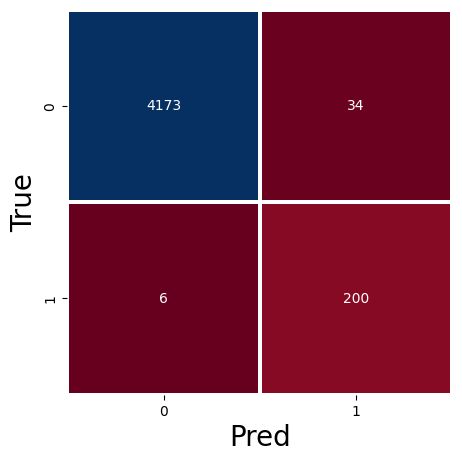

acc = 0.9909358712893723
precision = 0.8547008547008547
TPR = 0.970873786407767
FAR = 0.008081768481102924
FRR = 0.02912621359223301


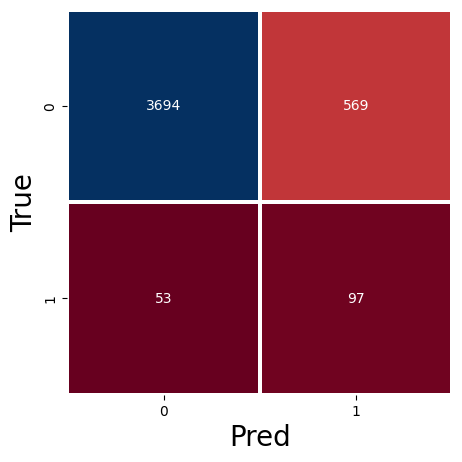

acc = 0.8590527985497394
precision = 0.14564564564564564
TPR = 0.6466666666666666
FAR = 0.13347407928688718
FRR = 0.35333333333333333


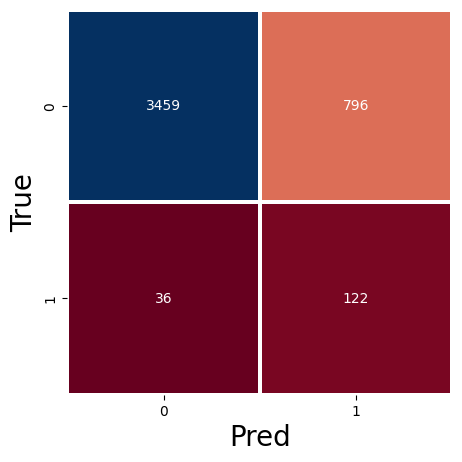

acc = 0.811466122818944
precision = 0.1328976034858388
TPR = 0.7721518987341772
FAR = 0.1870740305522914
FRR = 0.22784810126582278


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


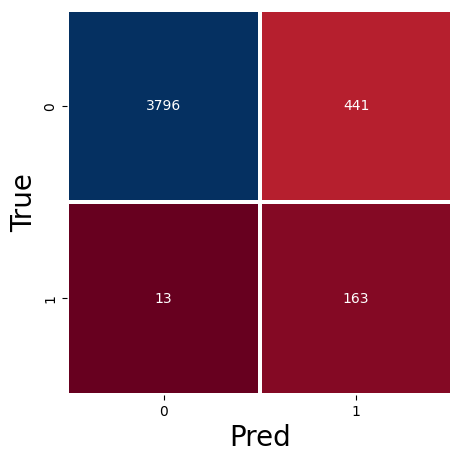

acc = 0.8971221391343757
precision = 0.26986754966887416
TPR = 0.9261363636363636
FAR = 0.10408307764928015
FRR = 0.07386363636363637


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


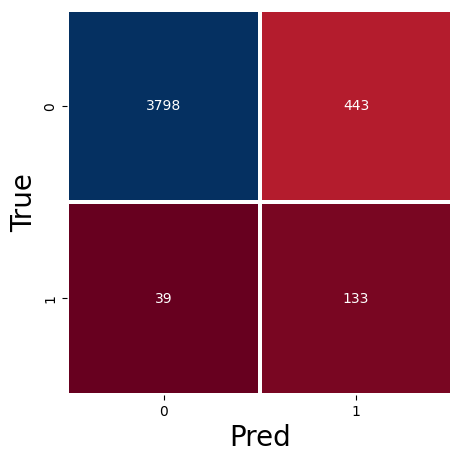

acc = 0.8907772490369363
precision = 0.2309027777777778
TPR = 0.7732558139534884
FAR = 0.10445649610940816
FRR = 0.22674418604651161
average acc = 0.8864422309579404
average precision = 0.31805089544344556
average TPR = 0.7831664915455342
average FAR = 0.10899070381375683
average FRR = 0.216833508454466
average EER = 0.10445649610940816


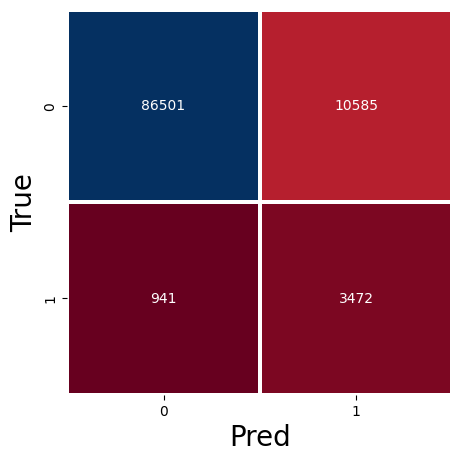

In [11]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        #X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
        X_re, y_re = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train.astype('int'))
        clf1 = svm.SVC(kernel='rbf', C=10)
        clf2 = MLPClassifier(hidden_layer_sizes=(100,10))
        voting_clf1 = VotingClassifier(estimators=[('svm', clf1), ('mlp', clf2)], voting='hard')
        
        voting_clf1.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = voting_clf1.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


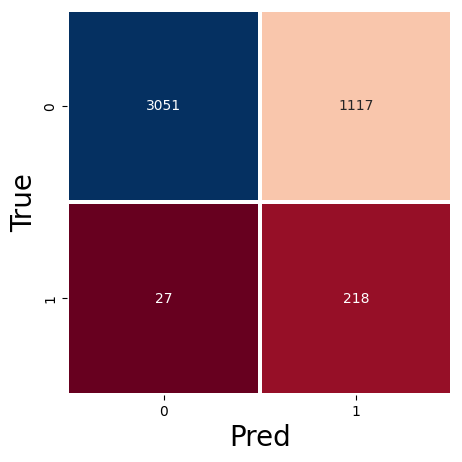

acc = 0.740765918876048
precision = 0.16329588014981272
TPR = 0.889795918367347
FAR = 0.2679942418426104
FRR = 0.11020408163265306


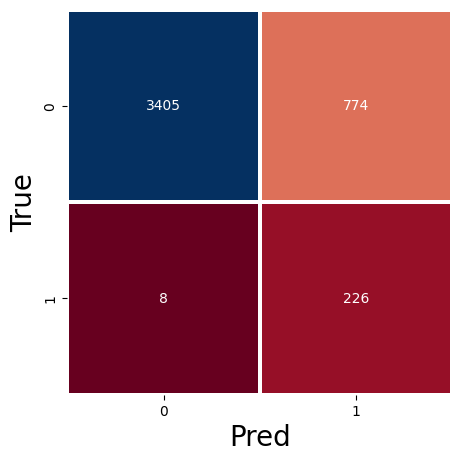

acc = 0.8227962837072287
precision = 0.226
TPR = 0.9658119658119658
FAR = 0.18521177315147164
FRR = 0.03418803418803419


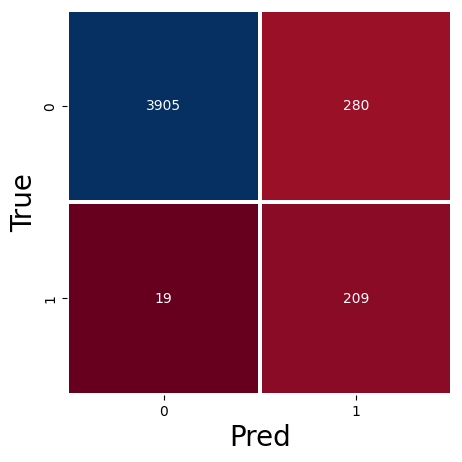

acc = 0.932245637888058
precision = 0.4274028629856851
TPR = 0.9166666666666666
FAR = 0.06690561529271206
FRR = 0.08333333333333333


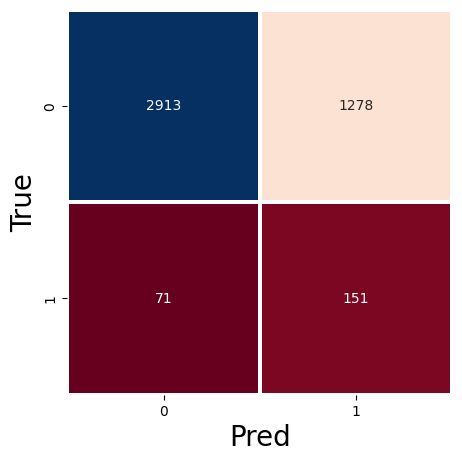

acc = 0.6943122592340811
precision = 0.10566829951014696
TPR = 0.6801801801801802
FAR = 0.3049391553328561
FRR = 0.31981981981981983


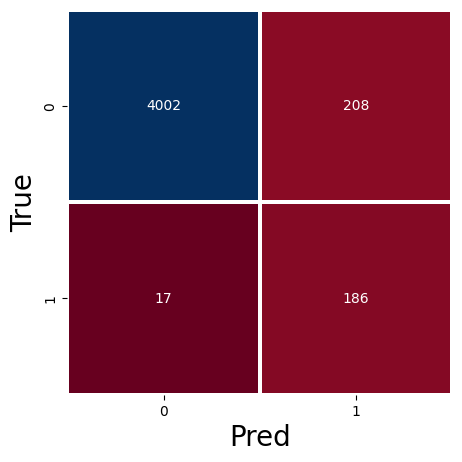

acc = 0.9490142760027193
precision = 0.4720812182741117
TPR = 0.916256157635468
FAR = 0.0494061757719715
FRR = 0.08374384236453201


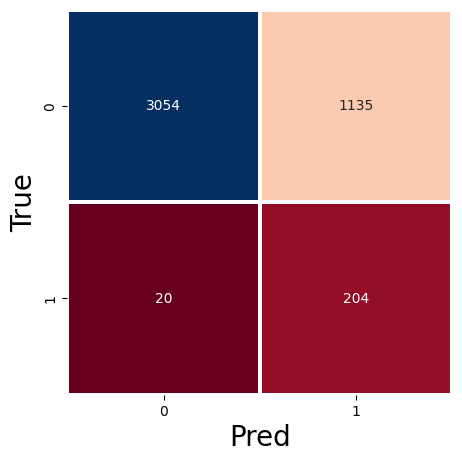

acc = 0.7382732834806254
precision = 0.15235250186706498
TPR = 0.9107142857142857
FAR = 0.2709477202196228
FRR = 0.08928571428571429


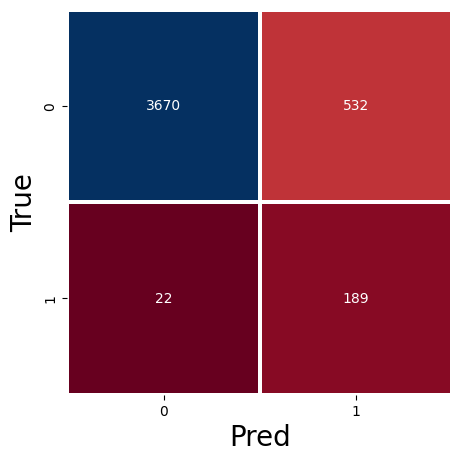

acc = 0.8744618173578065
precision = 0.2621359223300971
TPR = 0.8957345971563981
FAR = 0.12660637791527843
FRR = 0.10426540284360189


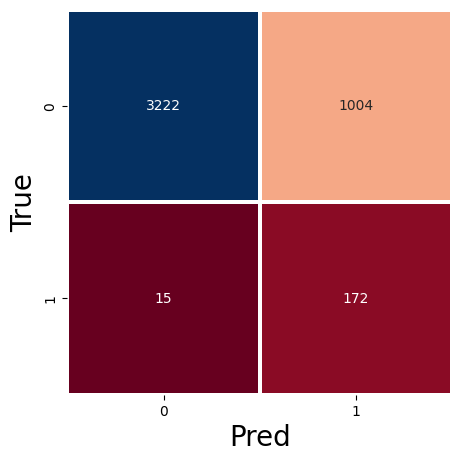

acc = 0.7690913210967596
precision = 0.14625850340136054
TPR = 0.9197860962566845
FAR = 0.2375769048745859
FRR = 0.08021390374331551


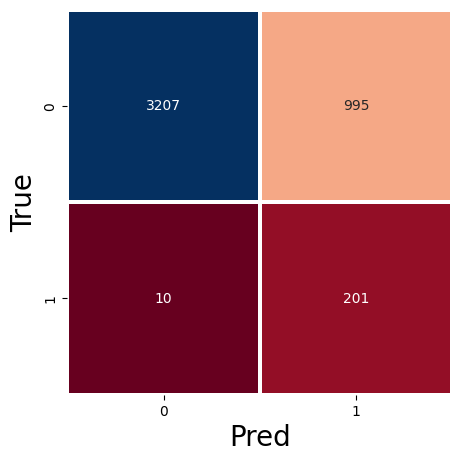

acc = 0.7722637661454793
precision = 0.16806020066889632
TPR = 0.95260663507109
FAR = 0.23679200380771062
FRR = 0.04739336492890995


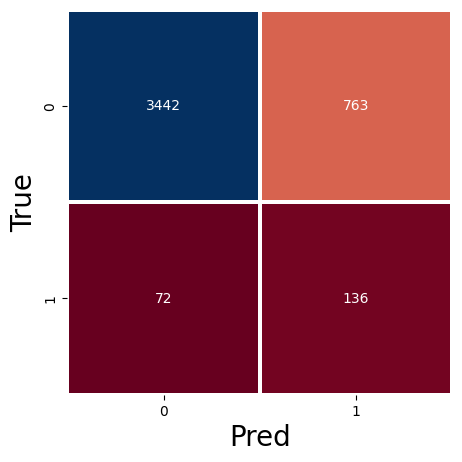

acc = 0.810786313165647
precision = 0.15127919911012236
TPR = 0.6538461538461539
FAR = 0.18145065398335314
FRR = 0.34615384615384615


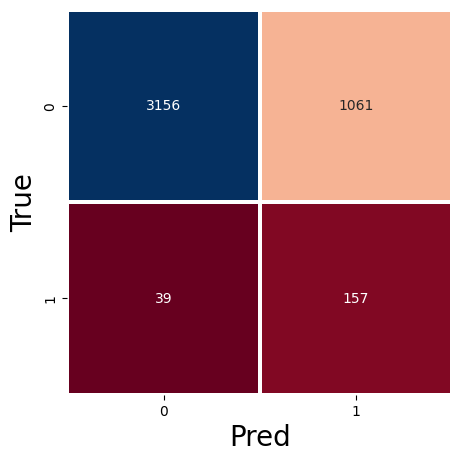

acc = 0.7507364604577385
precision = 0.12889983579638753
TPR = 0.8010204081632653
FAR = 0.2516006639791321
FRR = 0.1989795918367347


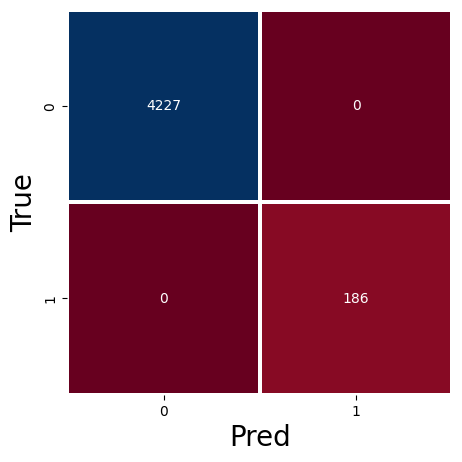

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


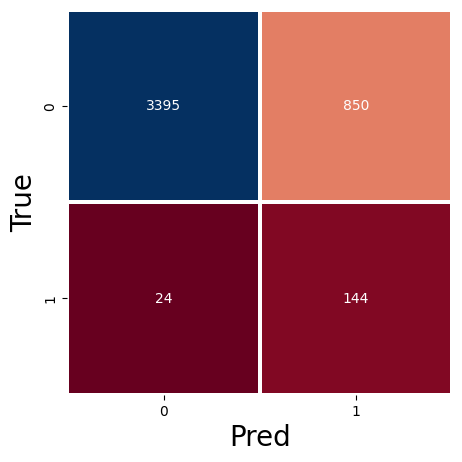

acc = 0.801948787672785
precision = 0.1448692152917505
TPR = 0.8571428571428571
FAR = 0.20023557126030625
FRR = 0.14285714285714285


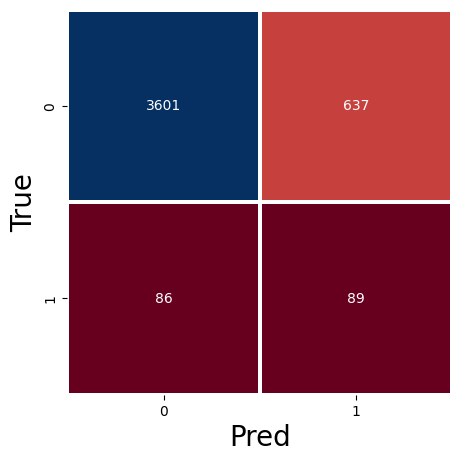

acc = 0.8361658735554045
precision = 0.12258953168044077
TPR = 0.5085714285714286
FAR = 0.15030674846625766
FRR = 0.49142857142857144


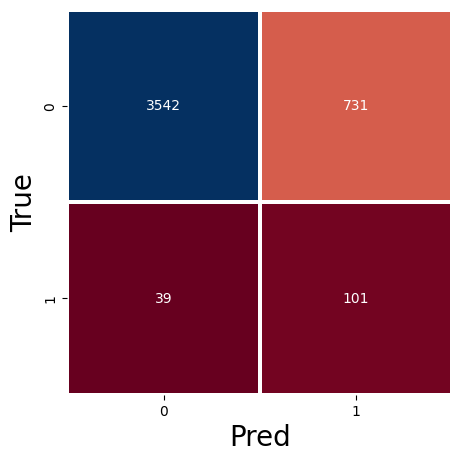

acc = 0.8255155223204169
precision = 0.12139423076923077
TPR = 0.7214285714285714
FAR = 0.171074186754037
FRR = 0.2785714285714286


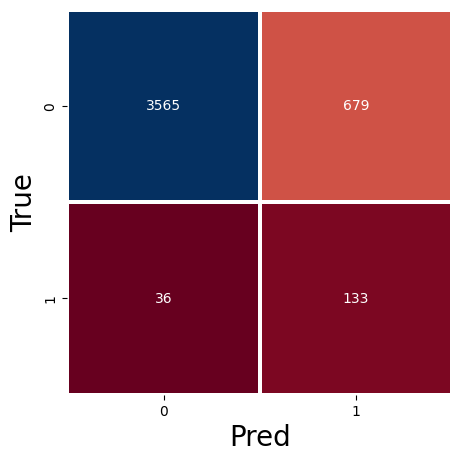

acc = 0.83797869929753
precision = 0.16379310344827586
TPR = 0.7869822485207101
FAR = 0.15999057492931196
FRR = 0.21301775147928995


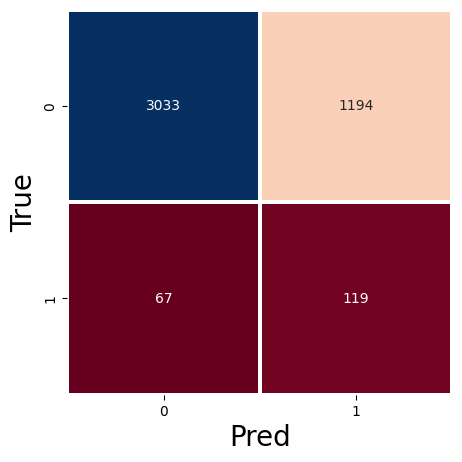

acc = 0.7142533423974621
precision = 0.09063214013709063
TPR = 0.6397849462365591
FAR = 0.28246983676366216
FRR = 0.3602150537634409


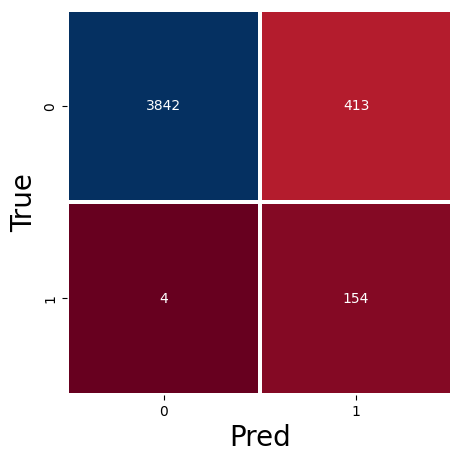

acc = 0.9055064581917063
precision = 0.2716049382716049
TPR = 0.9746835443037974
FAR = 0.09706227967097532
FRR = 0.02531645569620253


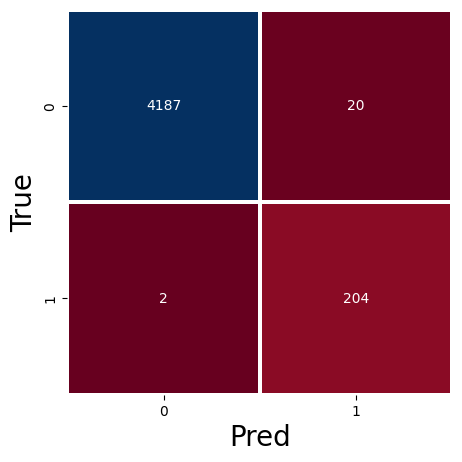

acc = 0.9950147292091548
precision = 0.9107142857142857
TPR = 0.9902912621359223
FAR = 0.004753981459472308
FRR = 0.009708737864077669


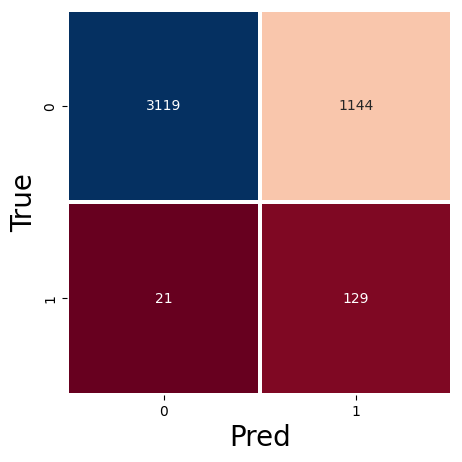

acc = 0.7360072513029685
precision = 0.10133542812254517
TPR = 0.86
FAR = 0.2683556181093127
FRR = 0.14


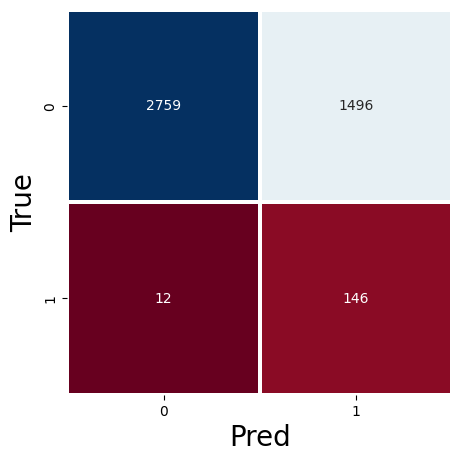

acc = 0.658282347609336
precision = 0.08891595615103533
TPR = 0.9240506329113924
FAR = 0.3515863689776733
FRR = 0.0759493670886076


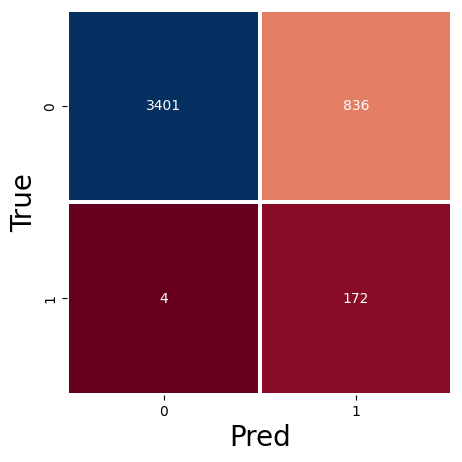

acc = 0.8096532970768185
precision = 0.17063492063492064
TPR = 0.9772727272727273
FAR = 0.19730941704035873
FRR = 0.022727272727272728


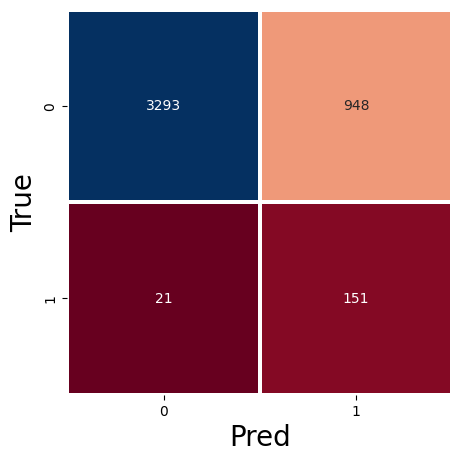

acc = 0.7804214819850442
precision = 0.13739763421292084
TPR = 0.877906976744186
FAR = 0.22353218580523462
FRR = 0.12209302325581395
average acc = 0.8154563099143834
average precision = 0.249013730805556
average TPR = 0.8530667069625067
average FAR = 0.18635252414816988
average FRR = 0.1469332930374932
average EER = 0.22353218580523462


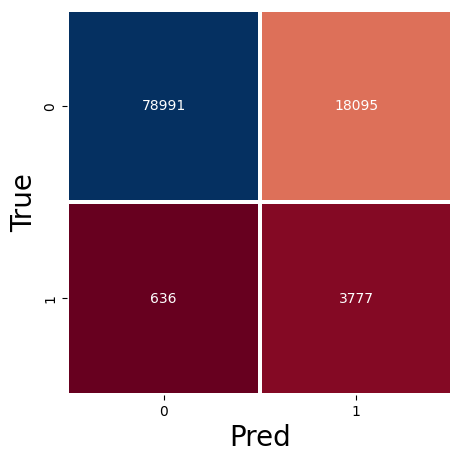

In [12]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        #X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
        X_re, y_re = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train.astype('int'))
        clf1 = svm.SVC(kernel='poly', C=10)
        clf2 = svm.SVC(kernel='rbf', C=10)
        voting_clf2 = VotingClassifier(estimators=[('svm1', clf1), ('svm2', clf2)], voting='hard')
        
        voting_clf2.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = voting_clf2.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


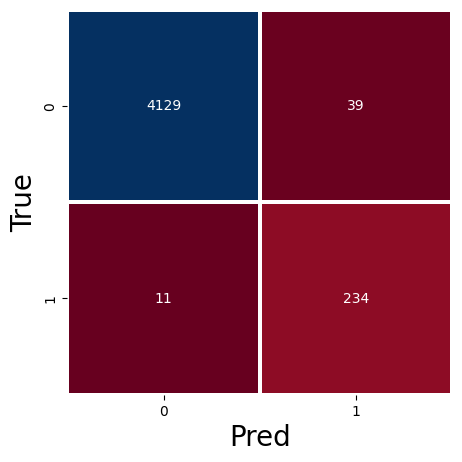

acc = 0.9886698391117154
precision = 0.8571428571428571
TPR = 0.9551020408163265
FAR = 0.00935700575815739
FRR = 0.044897959183673466


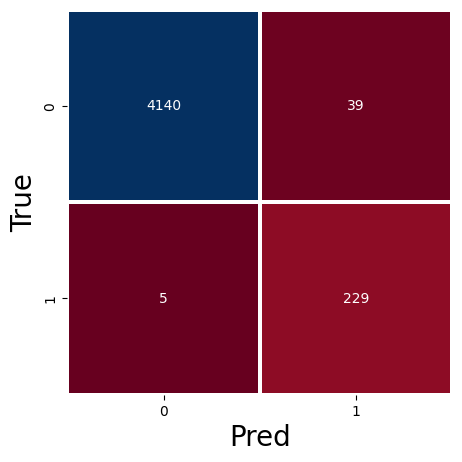

acc = 0.9900294584183096
precision = 0.8544776119402985
TPR = 0.9786324786324786
FAR = 0.00933237616654702
FRR = 0.021367521367521368


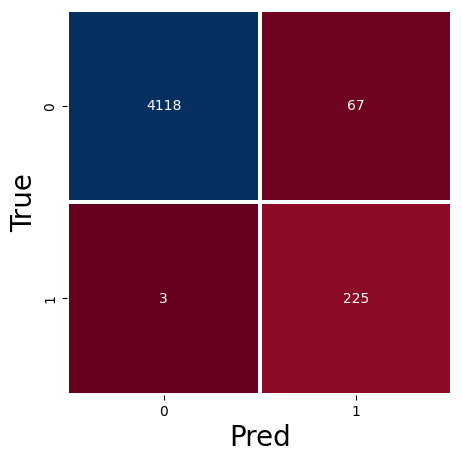

acc = 0.9841377747564015
precision = 0.7705479452054794
TPR = 0.9868421052631579
FAR = 0.016009557945041816
FRR = 0.013157894736842105


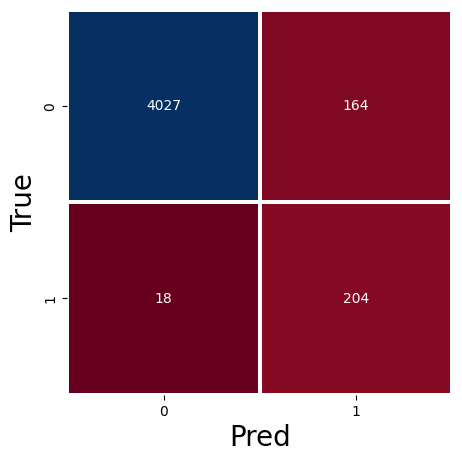

acc = 0.958758214366644
precision = 0.5543478260869565
TPR = 0.918918918918919
FAR = 0.03913147220233834
FRR = 0.08108108108108109


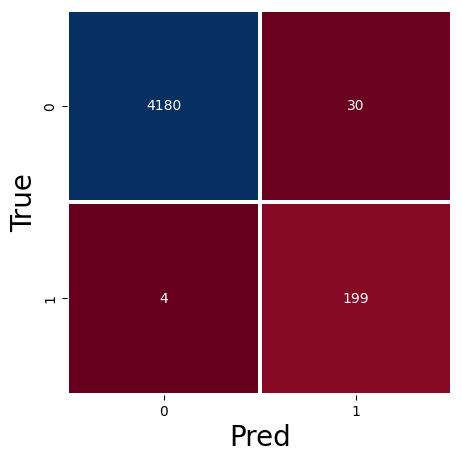

acc = 0.9922954905959664
precision = 0.868995633187773
TPR = 0.9802955665024631
FAR = 0.007125890736342043
FRR = 0.019704433497536946


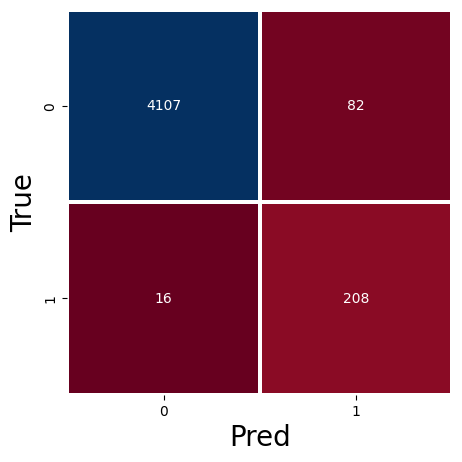

acc = 0.9777928846589622
precision = 0.7172413793103448
TPR = 0.9285714285714286
FAR = 0.01957507758414896
FRR = 0.07142857142857142


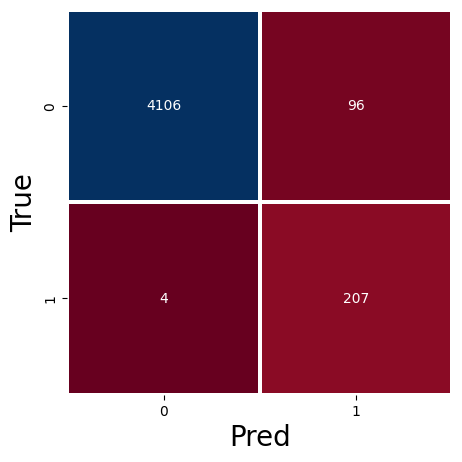

acc = 0.9773396782234308
precision = 0.6831683168316832
TPR = 0.981042654028436
FAR = 0.02284626368396002
FRR = 0.018957345971563982


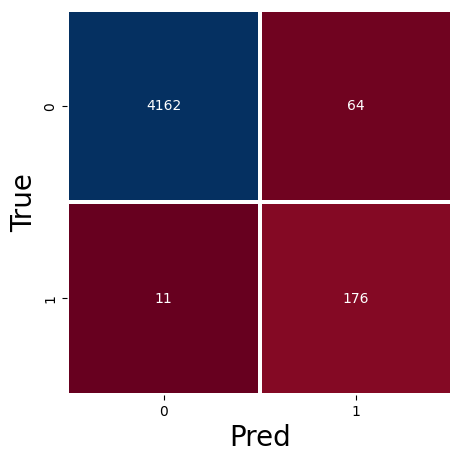

acc = 0.9830047586675731
precision = 0.7333333333333333
TPR = 0.9411764705882353
FAR = 0.015144344533838144
FRR = 0.058823529411764705


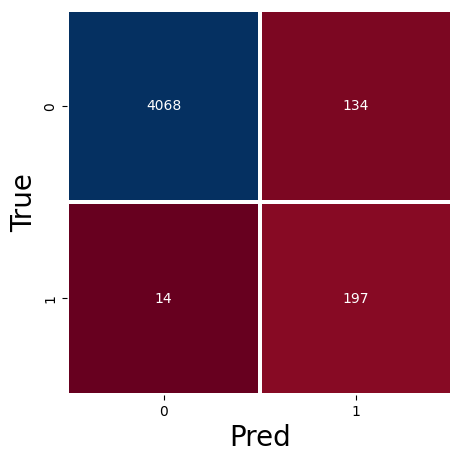

acc = 0.9664627237706775
precision = 0.595166163141994
TPR = 0.933649289099526
FAR = 0.0318895763921942
FRR = 0.06635071090047394


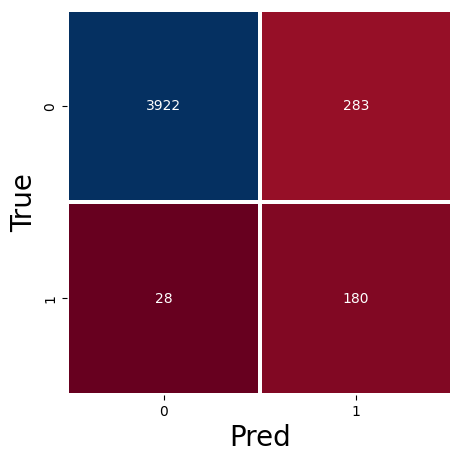

acc = 0.9295263992748697
precision = 0.38876889848812096
TPR = 0.8653846153846154
FAR = 0.06730083234244946
FRR = 0.1346153846153846


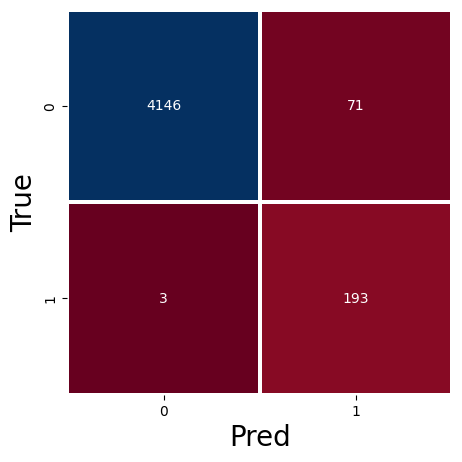

acc = 0.9832313618853388
precision = 0.7310606060606061
TPR = 0.9846938775510204
FAR = 0.01683661370642637
FRR = 0.015306122448979591


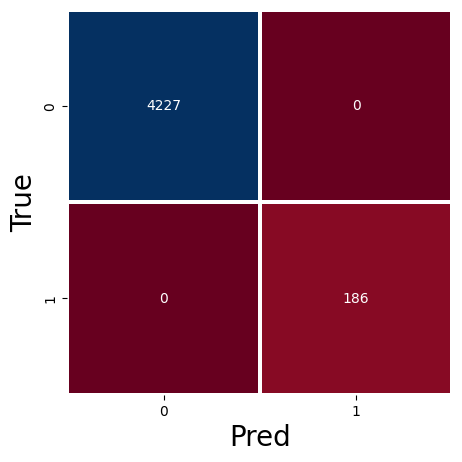

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


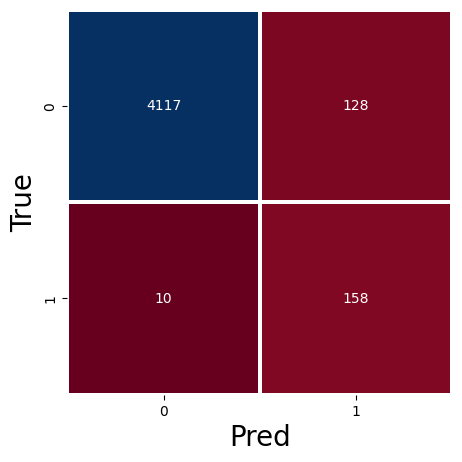

acc = 0.9687287559483345
precision = 0.5524475524475524
TPR = 0.9404761904761905
FAR = 0.030153121319199058
FRR = 0.05952380952380952


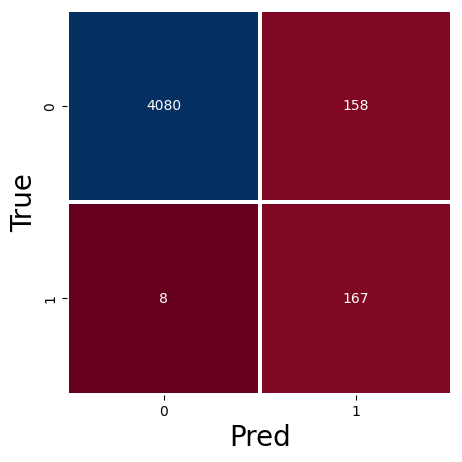

acc = 0.9623838658508951
precision = 0.5138461538461538
TPR = 0.9542857142857143
FAR = 0.03728173666823974
FRR = 0.045714285714285714


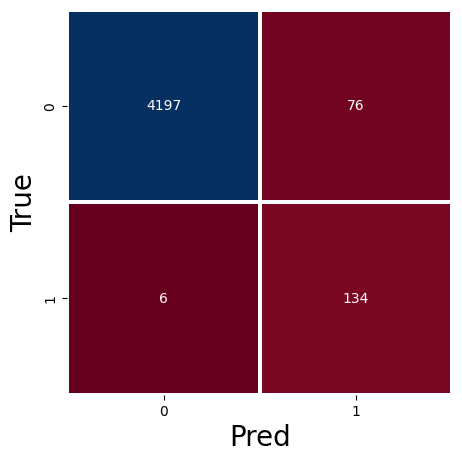

acc = 0.9814185361432133
precision = 0.638095238095238
TPR = 0.9571428571428572
FAR = 0.01778609875965364
FRR = 0.04285714285714286


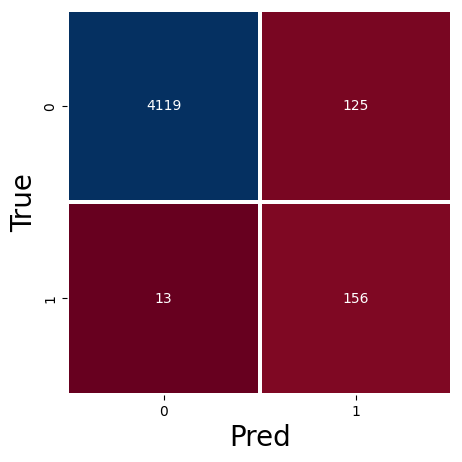

acc = 0.9687287559483345
precision = 0.5551601423487544
TPR = 0.9230769230769231
FAR = 0.02945334590009425
FRR = 0.07692307692307693


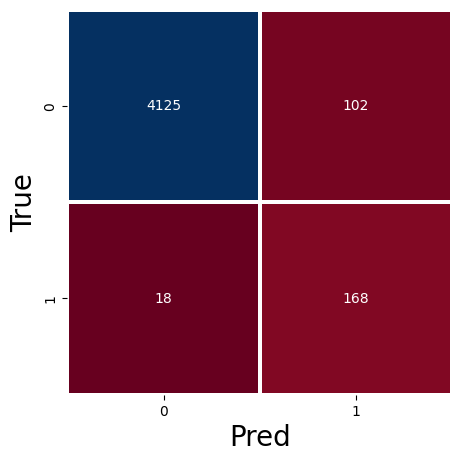

acc = 0.972807613868117
precision = 0.6222222222222222
TPR = 0.9032258064516129
FAR = 0.0241305890702626
FRR = 0.0967741935483871


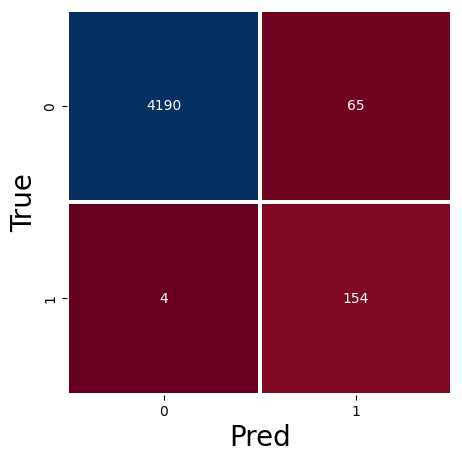

acc = 0.9843643779741672
precision = 0.7031963470319634
TPR = 0.9746835443037974
FAR = 0.01527614571092832
FRR = 0.02531645569620253


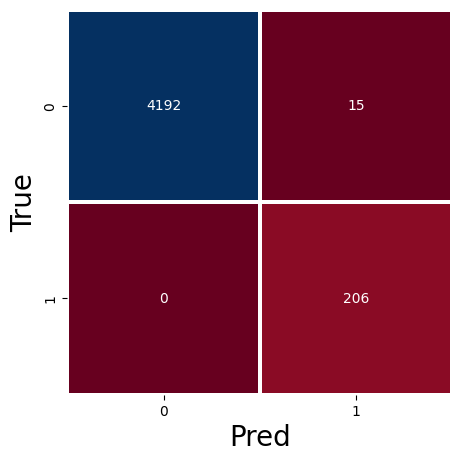

acc = 0.9966009517335146
precision = 0.9321266968325792
TPR = 1.0
FAR = 0.0035654860946042312
FRR = 0.0


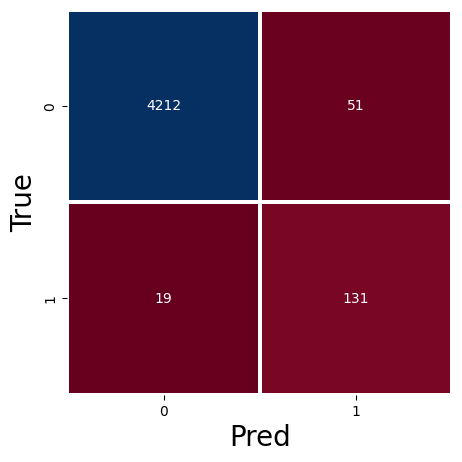

acc = 0.9841377747564015
precision = 0.7197802197802198
TPR = 0.8733333333333333
FAR = 0.011963406052076003
FRR = 0.12666666666666668


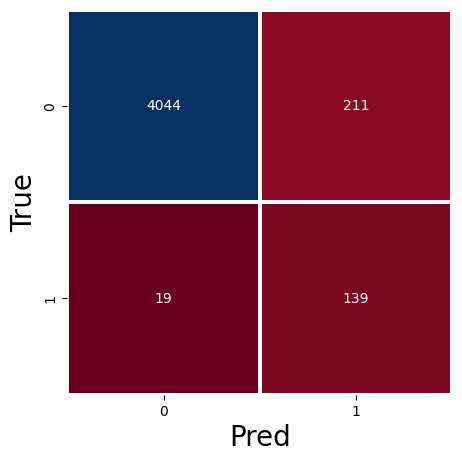

acc = 0.9478812599138908
precision = 0.39714285714285713
TPR = 0.879746835443038
FAR = 0.04958871915393655
FRR = 0.12025316455696203


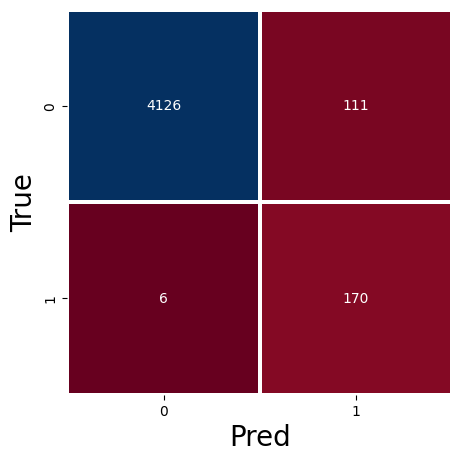

acc = 0.973487423521414
precision = 0.604982206405694
TPR = 0.9659090909090909
FAR = 0.026197781449138542
FRR = 0.03409090909090909


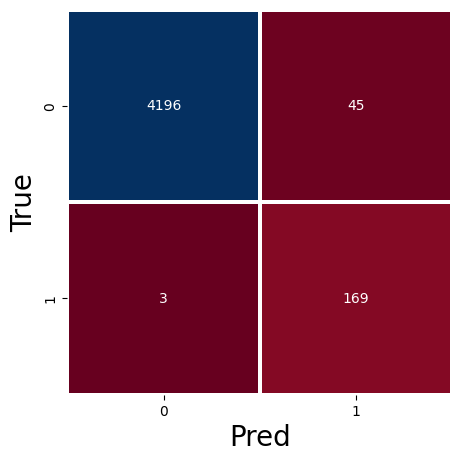

acc = 0.9891230455472467
precision = 0.7897196261682243
TPR = 0.9825581395348837
FAR = 0.010610705022400376
FRR = 0.01744186046511628
average acc = 0.9765613454319748
average precision = 0.6862160796978654
average TPR = 0.9482064295788717
average FAR = 0.02219809331530335
average FRR = 0.05179357042112835
average EER = 0.010610705022400376


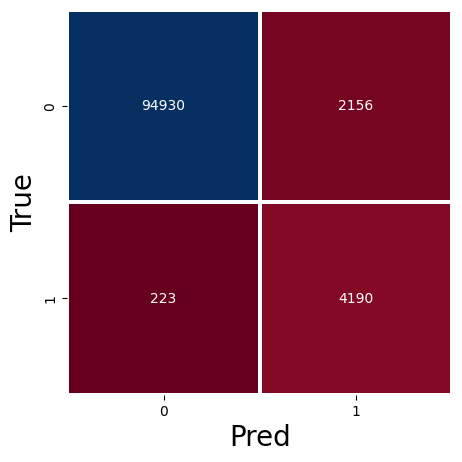

In [13]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        #X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
        X_re, y_re = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train.astype('int'))
        clf1 = DecisionTreeClassifier(criterion='entropy')
        clf2 = RandomForestClassifier(n_estimators=22)
        voting_clf3 = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2)], voting='hard')
        
        voting_clf3.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = voting_clf3.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()
